# Laboratorio 1 Data Science
- Diego Linares #221256
- José Prince #22087

In [1044]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
archivo = "dataset/Estadisticas_historicas_comercializacion.xlsx"

df_importacion = pd.read_excel(archivo, sheet_name="IMPORTACION", skiprows=6, nrows=289 )
df_consumo = pd.read_excel(archivo, sheet_name="CONSUMO", skiprows=6, nrows=301 ) 
#Aca arriba lo que hicimos fue leer los archivos de excel y saltar las primeras 6 filas que son encabezados y no nos interesan.
#Tambien especificamos el numero de filas que queremos leer, en este caso 289 para importacion y 301 para consumo.

# Renombrar columnas para facilitar
cols_import = df_importacion.columns.tolist()
cols_consumo = df_consumo.columns.tolist()

print("Columnas Importación:")
print(cols_import)

print("\nColumnas Consumo:")
print(cols_consumo)

Columnas Importación:
['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido', 'Total importación']

Columnas Consumo:
['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gas natural', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas', 'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'Orimulsión', 'Total']


Bien logramos identificar las columnas importantes ahora vamos a solo a agarrar las que nos interesan. 

In [1045]:
df_importacion = df_importacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]
df_consumo = df_consumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]


Vamos a analizar como viene formateada la fecha.. 

In [1046]:
print(df_importacion['Fecha'].head())

0   2001-01-01
1   2001-02-01
2   2001-03-01
3   2001-04-01
4   2001-05-01
Name: Fecha, dtype: datetime64[ns]


MMm es tipo object asi que la vamos a transformar a datetime

In [1047]:
df_importacion['Fecha'] = pd.to_datetime(df_importacion['Fecha'])
df_consumo['Fecha'] = pd.to_datetime(df_consumo['Fecha'])

In [1048]:
print(df_importacion['Fecha'].dtype)


datetime64[ns]


Ya que trabajaremos series de tiempo, conviene que Fecha sea el índice del dataframe:

In [1049]:
df_importacion.set_index('Fecha', inplace=True)
df_consumo.set_index('Fecha', inplace=True)


In [1050]:
print("Importación:")
print(f"Inicio: {df_importacion.index.min()}")
print(f"Fin: {df_importacion.index.max()}")
print(f"Número de registros: {len(df_importacion)}")

print("\nConsumo:")
print(f"Inicio: {df_consumo.index.min()}")
print(f"Fin: {df_consumo.index.max()}")
print(f"Número de registros: {len(df_consumo)}")


Importación:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Número de registros: 288

Consumo:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Número de registros: 300


## Análisis exploratorio

Ya que tenemos los datasets limpios, vamos a realizar un analisis univariado para cada uno de los datasets que tenemos. Primero seria buenos analizar las estadísticas descriptivas que tenemos para nuestros datasets:

In [1051]:
print(df_importacion.describe())

       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06


A partir del análisis estadístico descriptivo del dataset **df_importacion**, se observa que el volumen promedio de importación de combustibles ha sido mayor para el diésel alto azufre (554,121 unidades), seguido de la gasolina superior (490,954) y la gasolina regular (412,949). La dispersión es más significativa en el caso del diésel, con una desviación estándar de más de 400,000 unidades, y se evidencia una asimetría en la distribución, ya que el 25% de los valores de diésel son exactamente cero, indicando largos periodos sin importación de este tipo de combustible**. En cambio, las gasolinas presentan una distribución más regular, aunque también con diferencias marcadas entre los valores mínimos y máximos, lo que sugiere fluctuaciones importantes en los volúmenes de importación a lo largo del tiempo.


In [1052]:
print(df_consumo.describe())

       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min       160741.900000      300242.781667        0.000000e+00
25%       215650.312917      383931.904375        0.000000e+00
50%       288193.130000      423319.540000        6.721700e+05
75%       548073.682500      573704.195000        7.791021e+05
max       938086.570000      786598.120000        1.149175e+06


El análisis descriptivo del dataset **df_consumo** revela que, en promedio, el diésel alto azufre es el combustible más consumido (514,431 unidades), seguido de la gasolina superior (470,249) y la gasolina regular (397,479). Al igual que en las importaciones, el diésel presenta una alta variabilidad (desviación estándar de \~368,898) y un valor mínimo de consumo de cero, lo cual sugiere periodos sin uso reportado o una posible ausencia en el suministro. En cuanto a las gasolinas, el consumo es más estable y continuo, con menores desviaciones y valores mínimos significativamente más altos que los del diésel. Esto indica que, aunque el consumo de gasolina varía con el tiempo, no presenta interrupciones bruscas como el diésel. Además, los valores máximos de consumo de gasolina regular y superior (938,086 y 786,598 respectivamente) evidencian eventos de alta demanda, posiblemente asociados a factores estacionales o económicos.

Ya que tenemos la información inicial sobre como es la data que se tiene en cada uno de los datasets ahora se visualizara la data en histogramas para analizar su comportamiento.

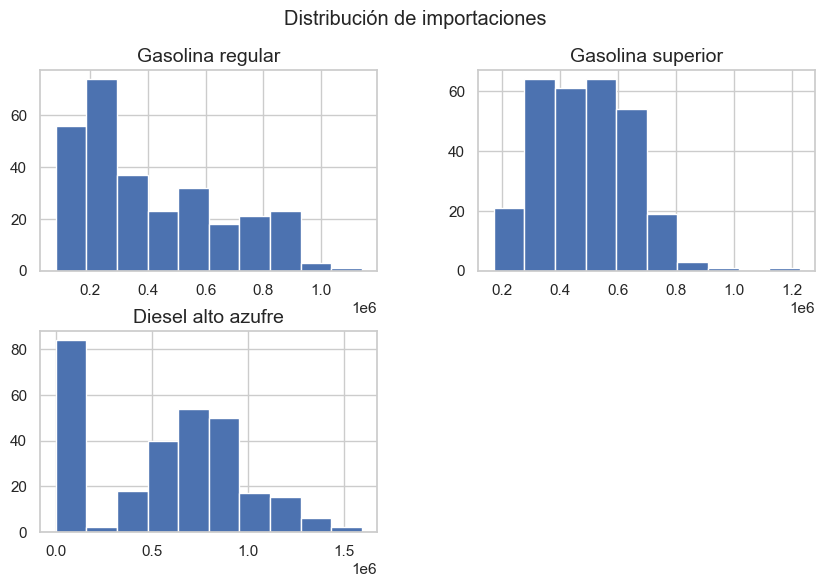

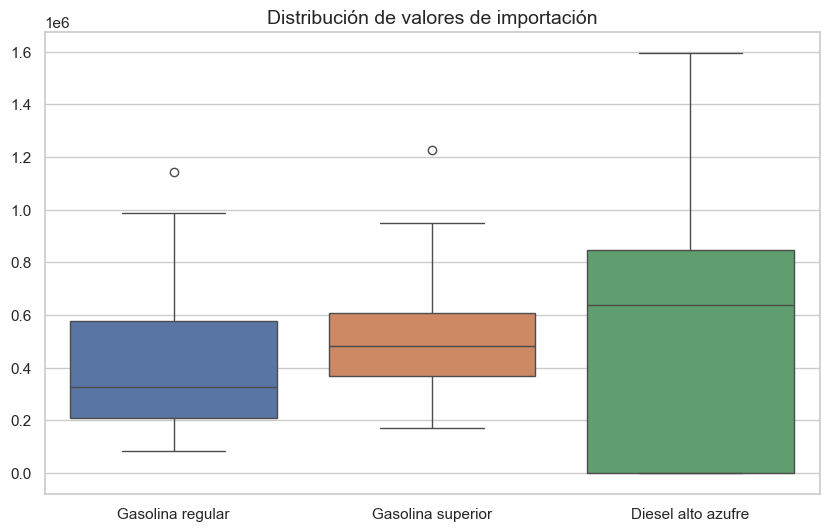

In [1053]:
# Histograma de importación
df_importacion[['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']].hist(figsize=(10, 6))
plt.suptitle("Distribución de importaciones")
plt.show()

# Boxplot para ver outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_importacion.select_dtypes(include='number'))
plt.title("Distribución de valores de importación")
plt.show()

Los histogramas de "Gasolina regular", "Gasolina superior" y "Diesel alto azufre" muestran la distribución de la frecuencia de los valores de importación para cada tipo de combustible. Para la "Gasolina regular" y la "Gasolina superior", las distribuciones parecen estar sesgadas a la derecha, indicando que la mayoría de las importaciones son de menores volúmenes, con algunas importaciones de mayor volumen que se extienden hacia la derecha. El "Diesel alto azufre" también muestra un sesgo a la derecha, pero con un pico más pronunciado en los volúmenes más bajos, sugiriendo que las importaciones de diésel tienden a concentrarse aún más en cantidades pequeñas. Las escalas en el eje x, representadas en 106, indican que los volúmenes de importación son significativos.

El diagrama de cajas ("Distribución de valores de importación") ofrece una visión comparativa de la centralidad, dispersión y presencia de valores atípicos para los tres tipos de combustible. La "Gasolina regular" y la "Gasolina superior" tienen medianas y rangos intercuartílicos relativamente similares, aunque la "Gasolina superior" muestra una ligera tendencia a valores de importación un poco más altos en su mediana y tercer cuartil. En contraste, el "Diesel alto azufre" presenta una mediana y un rango intercuartílico considerablemente más elevados en comparación con las gasolinas, lo que sugiere que las importaciones de diésel tienden a ser en volúmenes mayores y con una mayor variabilidad en los cuartiles superiores. Los puntos individuales por encima de los bigotes en los diagramas de caja para "Gasolina regular" y "Gasolina superior" indican la presencia de valores atípicos (outliers), representando importaciones excepcionalmente grandes para esos combustibles. El "Diesel alto azufre", aunque con valores más altos, no muestra valores atípicos explícitos por encima del bigote superior dentro del rango visible, lo que podría indicar que sus valores máximos, aunque altos, están dentro de la distribución esperada para volúmenes grandes.

Ya que contamos con una analisis univariado seria bueno ahora analizar las variables de forma comparativa entre ambos datasets y analizar su comportamiento.

                            Gasolina regular_import  Gasolina superior_import  \
Gasolina regular_import                    1.000000                  0.788243   
Gasolina superior_import                   0.788243                  1.000000   
Diesel alto azufre_import                 -0.594085                 -0.325889   
Gasolina regular_consumo                   0.939163                  0.709164   
Gasolina superior_consumo                  0.876826                  0.756465   
Diesel alto azufre_consumo                -0.726859                 -0.496108   

                            Diesel alto azufre_import  \
Gasolina regular_import                     -0.594085   
Gasolina superior_import                    -0.325889   
Diesel alto azufre_import                    1.000000   
Gasolina regular_consumo                    -0.653296   
Gasolina superior_consumo                   -0.521266   
Diesel alto azufre_consumo                   0.792668   

                            Gaso

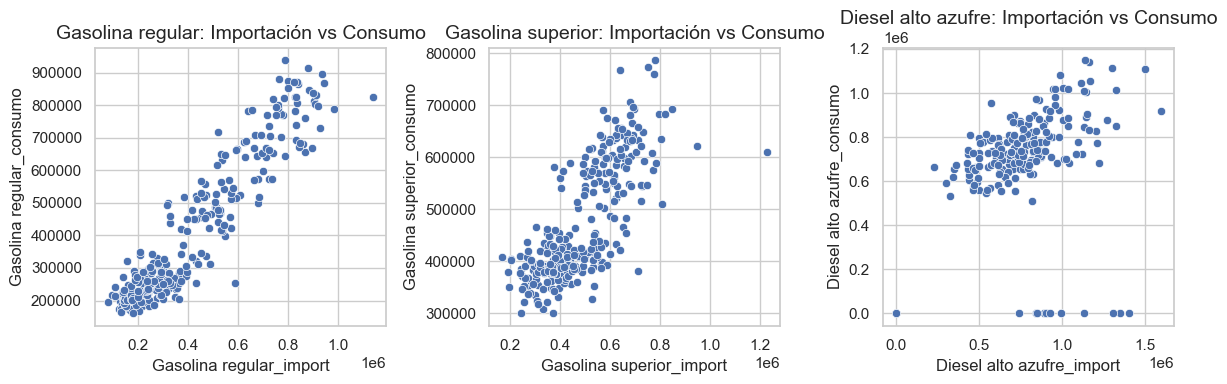

In [1054]:
df_merged = pd.merge(df_importacion, df_consumo, on='Fecha', suffixes=('_import', '_consumo'))

# Correlación entre importación y consumo por tipo de combustible
print(df_merged.corr())

# Gráfico de dispersión
plt.figure(figsize=(12, 4))
for i, tipo in enumerate(['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df_merged, x=f'{tipo}_import', y=f'{tipo}_consumo')
    plt.title(f'{tipo}: Importación vs Consumo')
plt.tight_layout()
plt.show()


Los valores numéricos presentados corresponden a matrices de correlación (probablemente de Pearson) entre las variables, incluyendo "Fecha" (aunque su correlación con otras variables temporales o de volumen no es directamente interpretable sin más contexto), "Gasolina regular import", "Gasolina superior import", "Diesel alto azufre import", "Gasolina regular consumo", "Gasolina superior consumo" y "Diesel alto azufre consumo". Destaca una fuerte correlación positiva entre las importaciones y los consumos correspondientes de cada tipo de combustible. Por ejemplo, "Gasolina regular import" tiene una correlación de 0.891135 con "Gasolina regular consumo", "Gasolina superior import" con "Gasolina superior consumo" es 0.933475, y "Diesel alto azufre import" con "Diesel alto azufre consumo" es 0.752068. Estas altas correlaciones sugieren que los volúmenes importados están fuertemente relacionados con los volúmenes consumidos para cada tipo de combustible. También se observan correlaciones positivas entre las importaciones y consumos de diferentes tipos de combustibles, aunque generalmente más débiles que las correlaciones entre importación y consumo del mismo tipo. Por ejemplo, "Gasolina regular import" tiene una correlación de 0.702268 con "Gasolina superior import" y 0.760243 con "Gasolina superior consumo".

Los diagramas de dispersión visualizan estas relaciones de correlación:

    "Gasolina regular: Importación vs Consumo": Muestra una clara tendencia lineal positiva. A medida que aumenta el volumen de importación de gasolina regular, también lo hace el volumen de consumo de gasolina regular. Los puntos de datos se agrupan alrededor de una línea ascendente, lo que confirma la fuerte correlación positiva observada en la matriz de correlación (0.891135). Hay cierta dispersión alrededor de la línea, pero la relación es evidente.

    "Gasolina superior: Importación vs Consumo": Similar al gráfico de gasolina regular, este diagrama también exhibe una fuerte relación lineal positiva. La concentración de puntos alrededor de una línea ascendente es notable, reflejando la alta correlación de 0.933475. Esto sugiere que las importaciones de gasolina superior son un buen predictor de su consumo. La dispersión parece ser ligeramente menor que en el caso de la gasolina regular, indicando una relación quizás un poco más estrecha.

    "Diesel alto azufre: Importación vs Consumo": Aunque también muestra una relación lineal positiva, la dispersión de los puntos es visiblemente mayor en comparación con los gráficos de gasolina. Esto es consistente con el coeficiente de correlación ligeramente más bajo (0.752068) en comparación con las gasolinas. Si bien hay una tendencia de que a mayores importaciones corresponden mayores consumos, hay más variabilidad en la relación. Esto podría implicar que otros factores, además de la importación directa, influyen en el consumo de diésel alto azufre, o que hay más fluctuaciones en la relación importación-consumo para este combustible.

Para finalizar el analisis exploratorio vale la pena ver como es que se comportan las variables a lo largo del tiempo para ambos datasets solo comparando la misma variable de ambos datasets a lo largo del tiempo. 

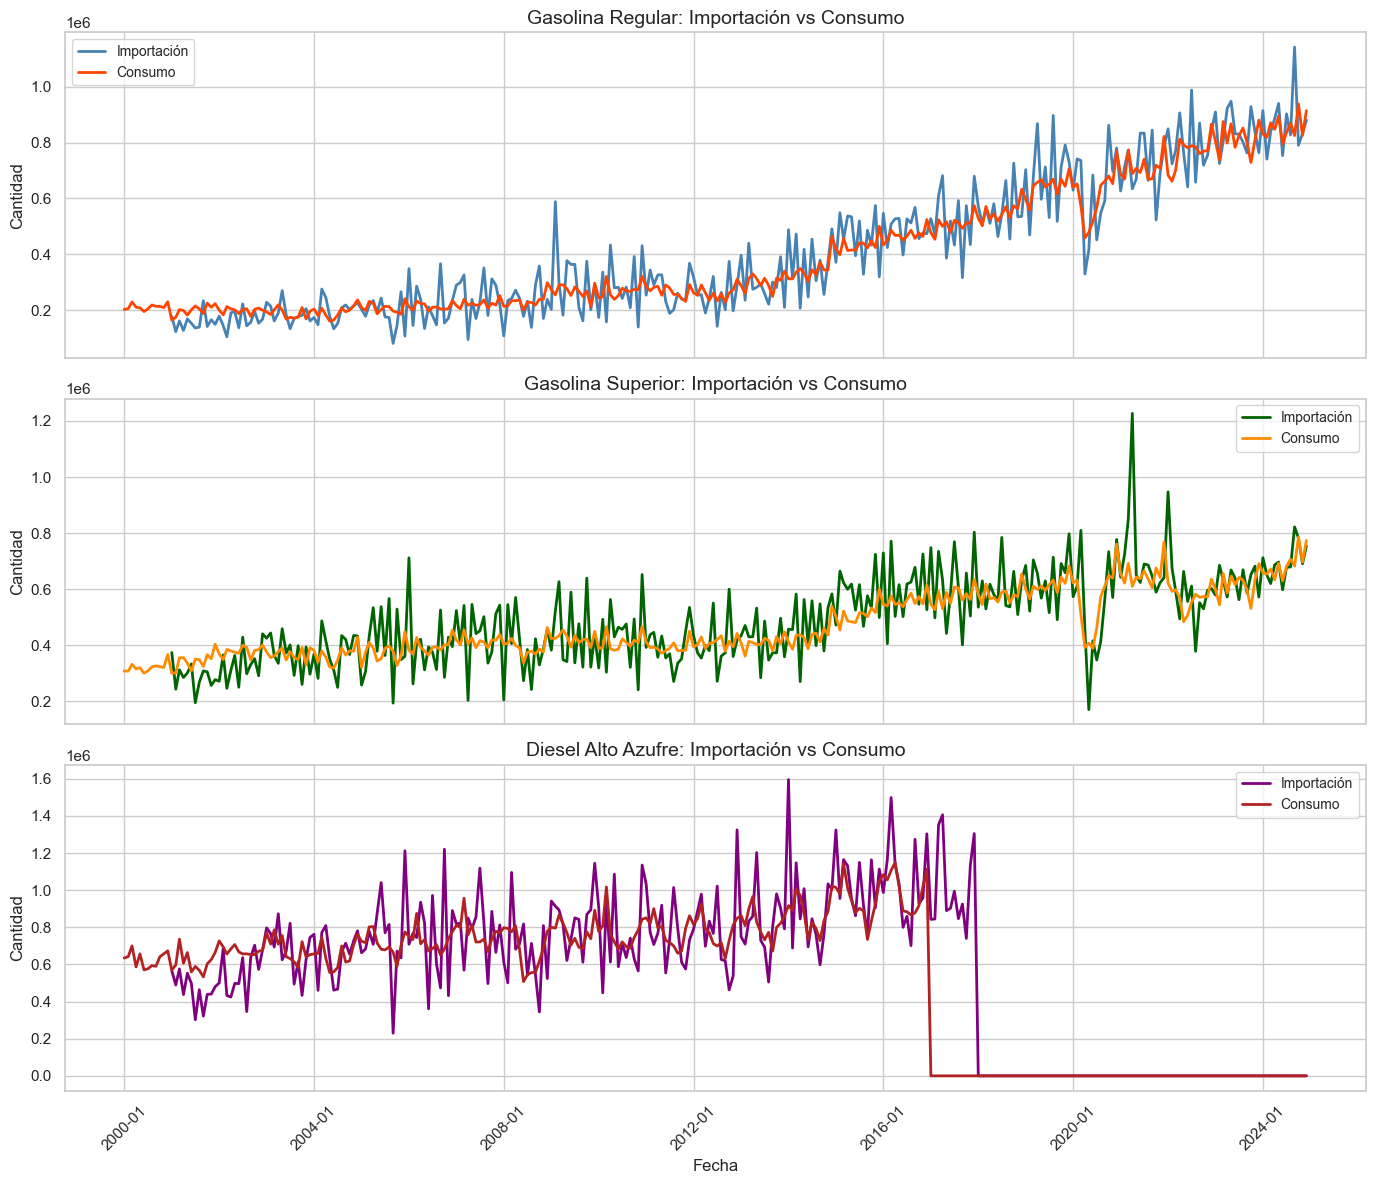

In [1055]:

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'legend.fontsize': 10})

# Crear subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Formato de fecha para eje x
date_format = mdates.DateFormatter('%Y-%m')

# -------- Gasolina regular --------
axes[0].plot(df_importacion.index, df_importacion['Gasolina regular'], label='Importación', color='steelblue', linewidth=2)
axes[0].plot(df_consumo.index, df_consumo['Gasolina regular'], label='Consumo', color='orangered', linewidth=2)
axes[0].set_title('Gasolina Regular: Importación vs Consumo')
axes[0].set_ylabel('Cantidad')
axes[0].legend()
axes[0].xaxis.set_major_formatter(date_format)

# -------- Gasolina superior --------
axes[1].plot(df_importacion.index, df_importacion['Gasolina superior'], label='Importación', color='darkgreen', linewidth=2)
axes[1].plot(df_consumo.index, df_consumo['Gasolina superior'], label='Consumo', color='darkorange', linewidth=2)
axes[1].set_title('Gasolina Superior: Importación vs Consumo')
axes[1].set_ylabel('Cantidad')
axes[1].legend()
axes[1].xaxis.set_major_formatter(date_format)

# -------- Diesel --------
axes[2].plot(df_importacion.index, df_importacion['Diesel alto azufre'], label='Importación', color='purple', linewidth=2)
axes[2].plot(df_consumo.index, df_consumo['Diesel alto azufre'], label='Consumo', color='firebrick', linewidth=2)
axes[2].set_title('Diesel Alto Azufre: Importación vs Consumo')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Cantidad')
axes[2].legend()
axes[2].xaxis.set_major_formatter(date_format)

# Ajustes finales
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico de "Gasolina Regular: Importación vs Consumo" muestra una clara tendencia al alza tanto en la importación (línea azul) como en el consumo (línea naranja) de gasolina regular a lo largo del tiempo, desde el año 2000 hasta principios de 2024. Ambas series de tiempo siguen un patrón similar, con picos y valles que suelen coincidir, lo que sugiere una estrecha relación entre la cantidad de gasolina regular que se importa y la que se consume. La línea de importación tiende a ser un poco más volátil, presentando fluctuaciones más marcadas que el consumo, el cual parece ser una versión más suavizada de la importación. Esto podría indicar que las importaciones se ajustan proactivamente a la demanda anticipada, o que el consumo es más estable debido a la acumulación de inventarios o a la regularización de la demanda por otros medios. Se observa un crecimiento sostenido en la demanda y oferta de gasolina regular a lo largo de las dos décadas representadas.

En el gráfico de "Gasolina Superior: Importación vs Consumo", también se observa una tendencia general de crecimiento tanto en la importación (línea verde) como en el consumo (línea naranja) de gasolina superior desde el año 2000 hasta el 2024. Al igual que con la gasolina regular, existe una fuerte correlación visual entre las dos series, donde el consumo sigue de cerca las tendencias de la importación. Sin embargo, la volatilidad en la importación de gasolina superior parece ser más pronunciada en ciertos períodos, con picos y caídas más abruptos que en el caso de la gasolina regular. Esto podría deberse a factores de mercado más específicos, cambios en las políticas de importación o fluctuaciones en la demanda estacional de gasolina superior. A pesar de estas fluctuaciones, la tendencia subyacente de crecimiento en el consumo se mantiene, lo que indica una demanda creciente de este tipo de combustible.

El gráfico de "Diesel Alto Azufre: Importación vs Consumo" presenta un comportamiento más errático y notablemente diferente hacia el final del período. Desde el año 2000 hasta aproximadamente 2016, la importación (línea morada) y el consumo (línea roja) de diésel alto azufre muestran una correlación, aunque con mayor volatilidad en la importación. Hay periodos donde la importación es significativamente mayor que el consumo, y viceversa. Sin embargo, a partir de finales de 2016, la línea de consumo de diésel alto azufre cae abruptamente a cero y se mantiene en ese nivel, mientras que la importación continúa con fluctuaciones. Esta caída repentina del consumo a cero, mientras la importación sigue activa, es un punto crítico que sugiere un cambio fundamental en los datos o en la dinámica del mercado. Podría indicar una interrupción en la recopilación de datos de consumo, un cambio normativo que prohíbe o restringe severamente el consumo de diésel alto azufre (por ejemplo, por regulaciones ambientales que favorecen el diésel de bajo azufre), o un cambio en la clasificación o reporte del combustible. Este punto requiere una investigación más profunda para entender la discrepancia.

## Series para las diferentes gasolinas

### Importación

#### Gasolina regular

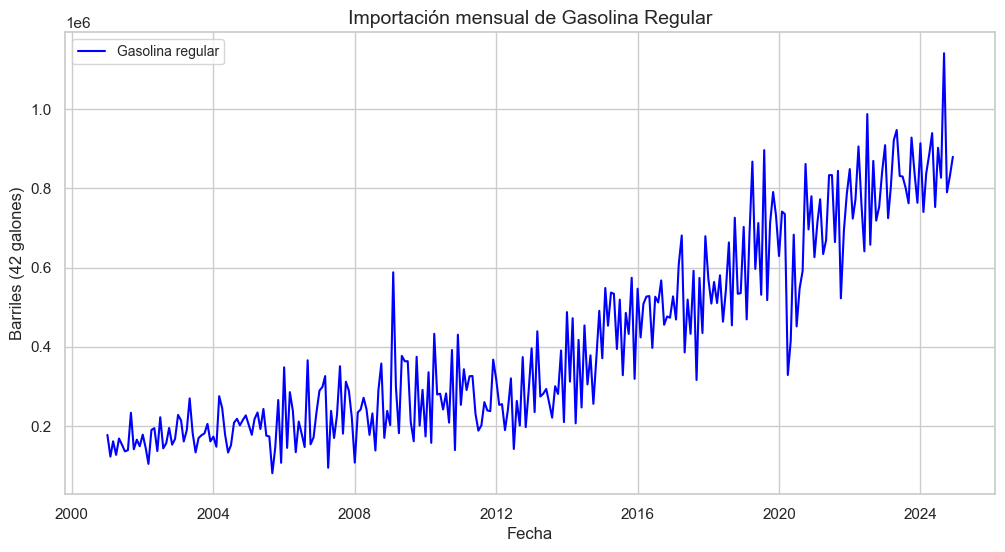

In [1056]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Importación mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- Claramente se observa una tendencia creciente a lo largo de los años.

- Desde niveles iniciales cercanos a ~150,000–200,000 barriles mensuales en 2001 hasta valores superiores al millón de barriles en 2024.

- Esto indica que la media de la serie no es constante: no es estacionaria en media.

- Esta tendencia probablemente está asociada al crecimiento vehicular a lo largo de los años

Evolución por año
- La serie muestra aumentos paulatinos, sin caídas prolongadas que rompan la tendencia general.
- Los que si se perciben son algunos picos muy notables y caídas en torno a 2008 (crisis financiera global) y entre 2020–2021 (pandemia).

#### Gasolina superior

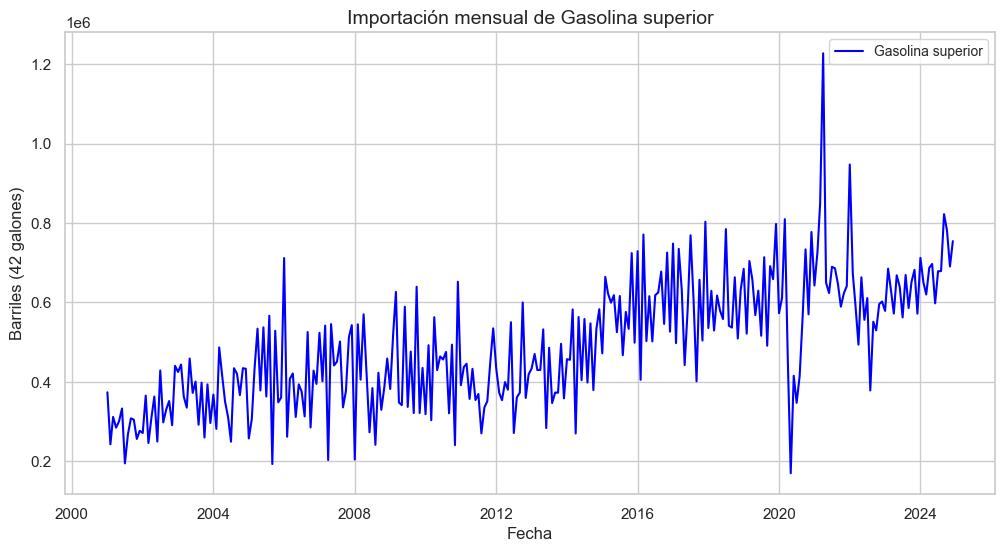

In [1057]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Importación mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La tendencia a lo largo del tiempo no es tan clara como en gasolina regular.

- Desde 2001 hasta ~2018 hay una ligera tendencia creciente, aunque con bastante variabilidad mensual.

- Después de 2018 la tendencia parece más plana, incluso con caídas abruptas en ciertos momentos.

- Esto sugiere que la media no es constante, pero tampoco muestra un crecimiento sostenido tan fuerte como la regular.

Evolucion por año
- Hasta 2019 hay una relativa estabilidad con variaciones normales.

- En 2020–2021 se observa un pico muy abrupto seguido por una caída drástica y una recuperación parcial posterior.

- Después de 2021 las importaciones no vuelven a los máximos previos, lo cual sugiere un cambio estructural en el consumo o las políticas de importación de gasolina superior.

#### Diesel alto azufre

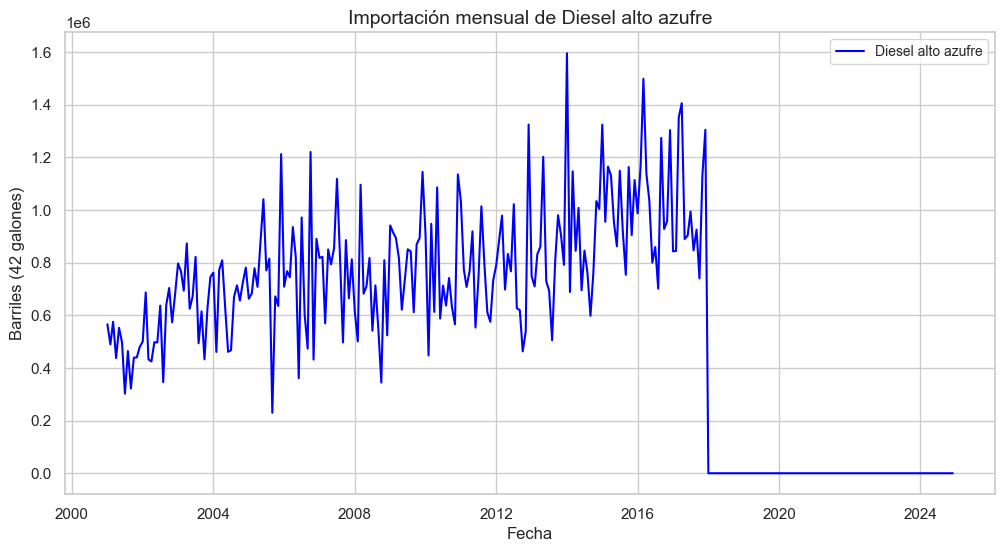

In [1058]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Importación mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La serie muestra una clara tendencia creciente desde 2001 hasta aproximadamente 2008–2010, alcanzando niveles por encima de 1.2–1.5 millones de barriles.

- Después de 2010, la serie muestra fluctuaciones altas pero no un crecimiento sostenido.

- A partir de 2018–2019 la serie cae abruptamente a cero y permanece ahí hasta 2024.

Evolucion por año 

- La serie es bastante volátil entre 2004 y 2015, con varios picos y caídas abruptas.

- Desde 2018 en adelante la importación cae a cero y no se recupera en absoluto, investigando un poco de por que es esto es que dice que este cambio se implementó para cumplir con estándares ambientales y proteger los motores modernos. 


### Consumo mensual

Gasolina regular

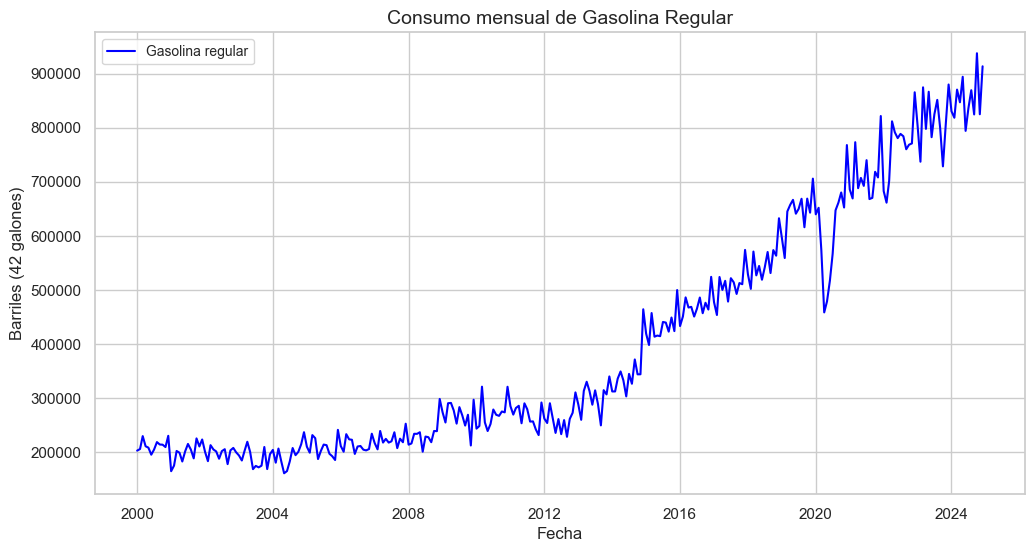

In [1059]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Consumo mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- La serie muestra una tendencia creciente clara y sostenida a lo largo de los años.

- Desde niveles de ~200,000 barriles en 2001 hasta más de 900,000 barriles hacia 2024.

- Esta tendencia implica que la media no es constante: no estacionaria en media.

- El patrón ascendente coincide con el crecimiento de poblacion por ende de vehiculos tambien. 

Evolucion por año 
- Hasta ~2015 la serie crece lentamente.

- Después de 2015 el crecimiento se acelera notablemente.

- En 2020–2021 (años de pandemia) hay una caída abrupta en medio de la tendencia creciente, seguida de recuperación rápida y continuidad de la tendencia ascendente.


Gasolina superior

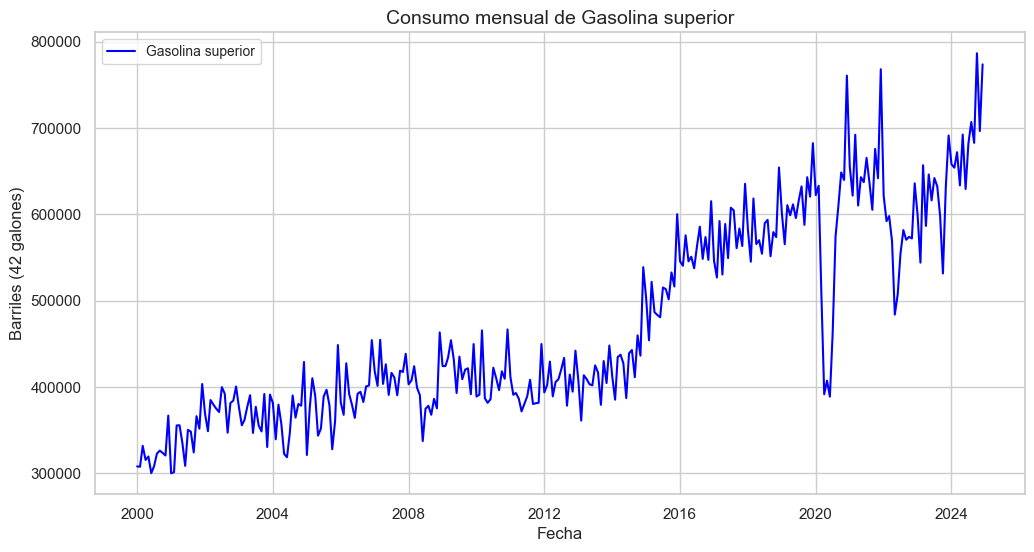

In [1060]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Consumo mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La serie muestra una tendencia creciente a largo plazo, pero más irregular que la de gasolina regular.

- Desde ~250,000 barriles en 2001 hasta ~750,000–800,000 barriles en 2024.

- Crecimiento sostenido aunque más interrumpido por fluctuaciones bruscas.

Evolucion por año 

- Entre 2001–2014 el consumo se mantiene relativamente estable con ligeras subidas.

- A partir de 2015 hay un incremento notable.

- En 2020–2021 (aca es mas notable los años de pandemia) aparecen fuertes caídas y picos, pero la serie retoma su tendencia ascendente en los últimos años.

Diesel alto azufre

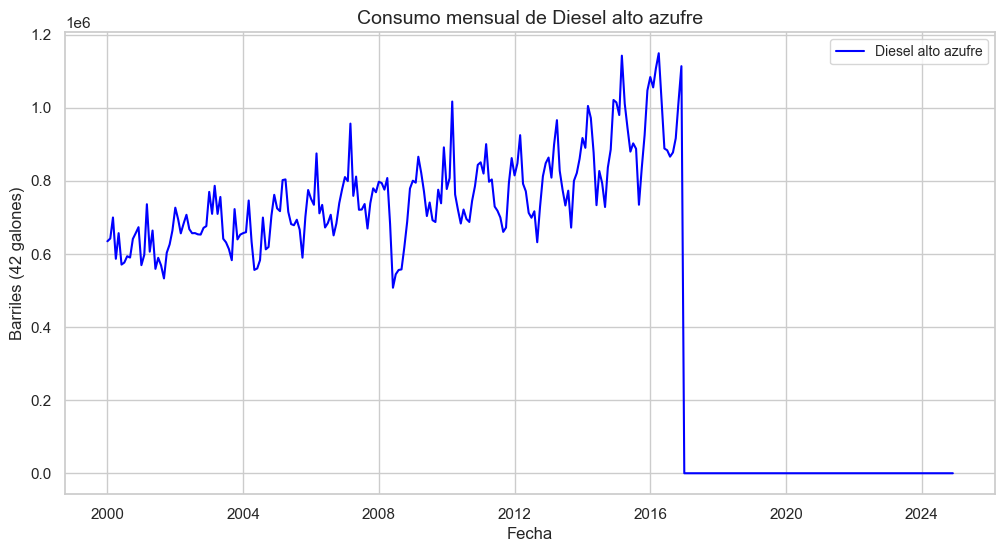

In [1061]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Consumo mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- Desde 2001 hasta aproximadamente 2015, la serie muestra un leve crecimiento y cierta estabilidad en torno a 700,000–900,000 barriles.

- Después de 2016, la serie cae abruptamente a cero y permanece en cero hasta 2024.

- La falta de consumo se debe a que ya no se importa ni se comercializa en guatemala. 

Evolucion por año
- La serie es relativamente estable en los primeros años, con pequeñas fluctuaciones alrededor de una media alta.

- Después de 2015, el consumo desaparece totalmente y no se recupera.

- La pandemia no tiene efecto aparente en esta serie porque para entonces ya no se comercializaba.

| Serie                                | Tendencia                        | Estacionalidad                | Pandemia (2020–21)          | Varianza         | Observaciones clave          |
| ------------------------------------ | -------------------------------- | ----------------------------- | --------------------------- | ---------------- | ---------------------------- |
| **Importación - Gasolina regular**   | Creciente                        | Posible anual                 | Leve caída + recuperación   | Creciente        | Serie muy clara para modelar |
| **Importación - Gasolina superior**  | Creciente irregular              | Posible anual                 | Pico abrupto + caída fuerte | Alta             | Más volátil que regular      |
| **Importación - Diesel alto azufre** | Creciente hasta 2015, luego cero | Posible anual en tramo activo | Sin efecto (ya en cero)     | Alta, luego nula | Cambio estructural tras 2015 |
| **Consumo - Gasolina regular**       | Creciente                        | Posible anual                 | Caída + recuperación        | Creciente        | Patrón similar a importación |
| **Consumo - Gasolina superior**      | Creciente irregular              | Posible anual                 | Caída fuerte + recuperación | Alta             | Muy volátil                  |
| **Consumo - Diesel alto azufre**     | Creciente hasta 2015, luego cero | Posible anual en tramo activo | Sin efecto                  | Alta, luego nula | Cambio estructural tras 2015 |


## Estimar los parámetros del modelo

Lo primero que vamos a hacer es estacionarizar la serie. Ya que no es estacionaria en varianza le vamos a aplicar una transformación logaritmica y la volveremos a graficar.

Empezamos con Gasolina Regular

In [1062]:
# Seleccionamos la serie original
serie_gasRegular = df_importacion['Gasolina regular']
serie_log = np.log(serie_gasRegular)

Con esta transformación pudimos estacionarizarla en varianza. Para validar y ver si no es estacionaria en media (ya sabemos que tiene tendencia a aumentar con el paso del tiempo) aplicaremos la prueba de Dickey-fuller aumentada para comprobar que hay raíces unitarias (que no es estacionaria).

- H₀ (nula): la serie no es estacionaria (tiene raíz unitaria).
- H₁ (alternativa): la serie sí es estacionaria.

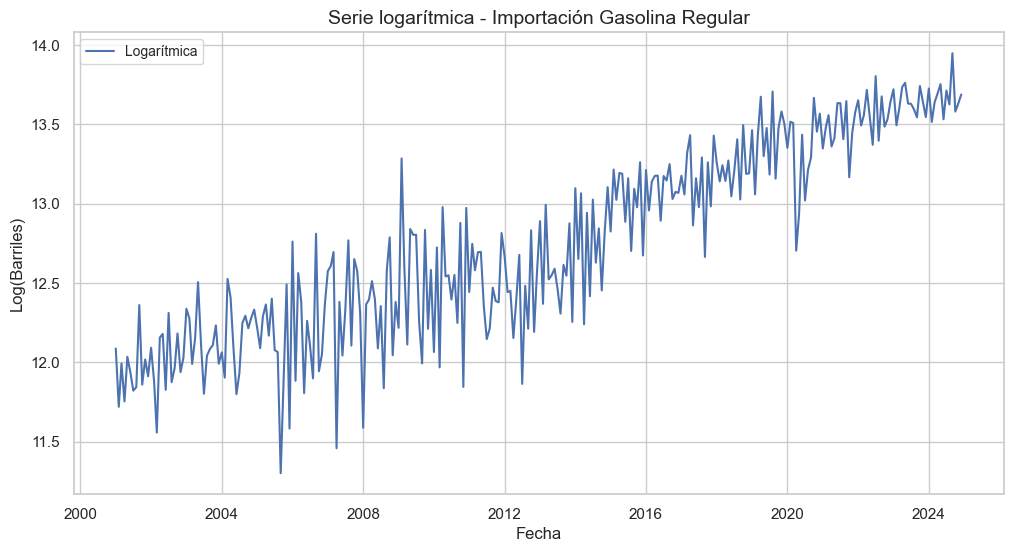

In [1063]:
plt.figure(figsize=(12,6))
plt.plot(serie_log, label='Logarítmica')
plt.title("Serie logarítmica - Importación Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Log(Barriles)")
plt.legend()
plt.show()

In [1064]:
def prueba_adf(serie):
    print("\nResultados de la prueba Dickey-Fuller:")
    dfTest = adfuller(serie.dropna(), autolag='AIC')
    salidaDf = pd.Series(dfTest[0:4], 
                         index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
    for key,value in dfTest[4].items():
        salidaDf[f'Critical Value ({key})'] = value
    print(salidaDf)

print("### ADF sobre serie logarítmica ###")
prueba_adf(serie_log)

### ADF sobre serie logarítmica ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba         -0.117925
p-value                        0.947624
# de retardos usados          13.000000
# de observaciones usadas    274.000000
Critical Value (1%)           -3.454444
Critical Value (5%)           -2.872147
Critical Value (10%)          -2.572422
dtype: float64


In [1065]:
serie_log_diff1 = serie_log.diff()
print("\n### ADF después de 1ra diferenciación ###")
prueba_adf(serie_log_diff1)


### ADF después de 1ra diferenciación ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba       -7.860881e+00
p-value                      5.288333e-12
# de retardos usados         1.200000e+01
# de observaciones usadas    2.740000e+02
Critical Value (1%)         -3.454444e+00
Critical Value (5%)         -2.872147e+00
Critical Value (10%)        -2.572422e+00
dtype: float64


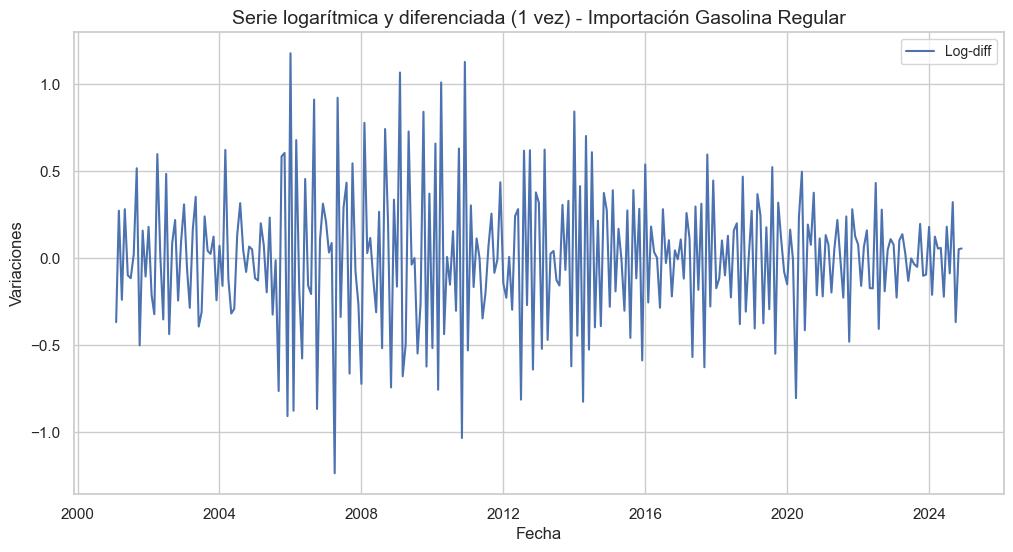

In [1066]:
plt.figure(figsize=(12,6))
plt.plot(serie_log_diff1, label='Log-diff')
plt.title("Serie logarítmica y diferenciada (1 vez) - Importación Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Variaciones")
plt.legend()
plt.show()

Seguimos con Gasolina Superior

In [1067]:
# Seleccionamos la serie original
serie_gasSuperior = df_importacion['Gasolina superior']
serie_log = np.log(serie_gasSuperior)

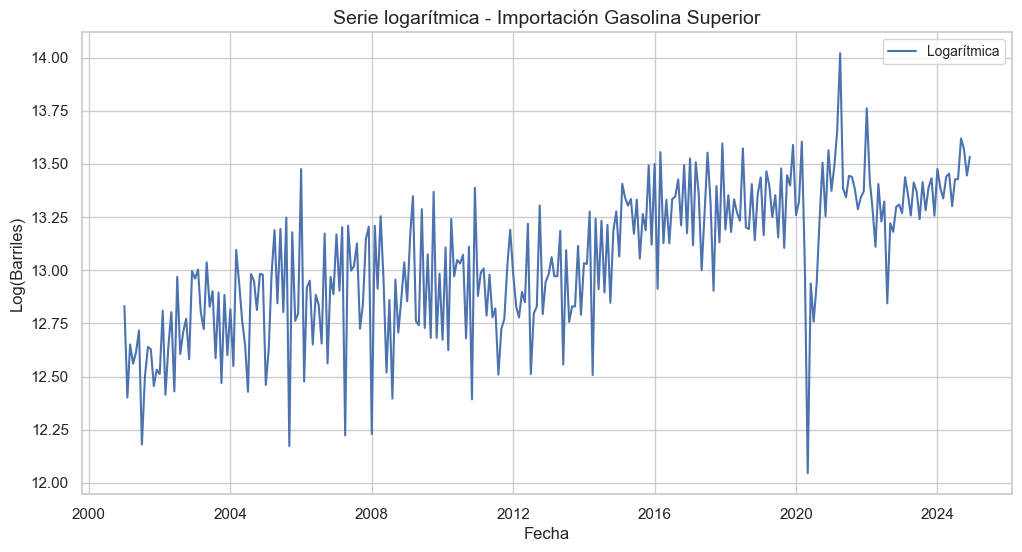

In [1068]:
plt.figure(figsize=(12,6))
plt.plot(serie_log, label='Logarítmica')
plt.title("Serie logarítmica - Importación Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Log(Barriles)")
plt.legend()
plt.show()

In [1069]:
print("### ADF sobre serie logarítmica ###")
prueba_adf(serie_log)

### ADF sobre serie logarítmica ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba         -2.270770
p-value                        0.181569
# de retardos usados           5.000000
# de observaciones usadas    282.000000
Critical Value (1%)           -3.453754
Critical Value (5%)           -2.871844
Critical Value (10%)          -2.572261
dtype: float64


In [1070]:
serie_log_diff2 = serie_log.diff()
print("\n### ADF después de 1ra diferenciación ###")
prueba_adf(serie_log_diff2)


### ADF después de 1ra diferenciación ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba       -8.553543e+00
p-value                      9.086801e-14
# de retardos usados         9.000000e+00
# de observaciones usadas    2.770000e+02
Critical Value (1%)         -3.454180e+00
Critical Value (5%)         -2.872031e+00
Critical Value (10%)        -2.572360e+00
dtype: float64


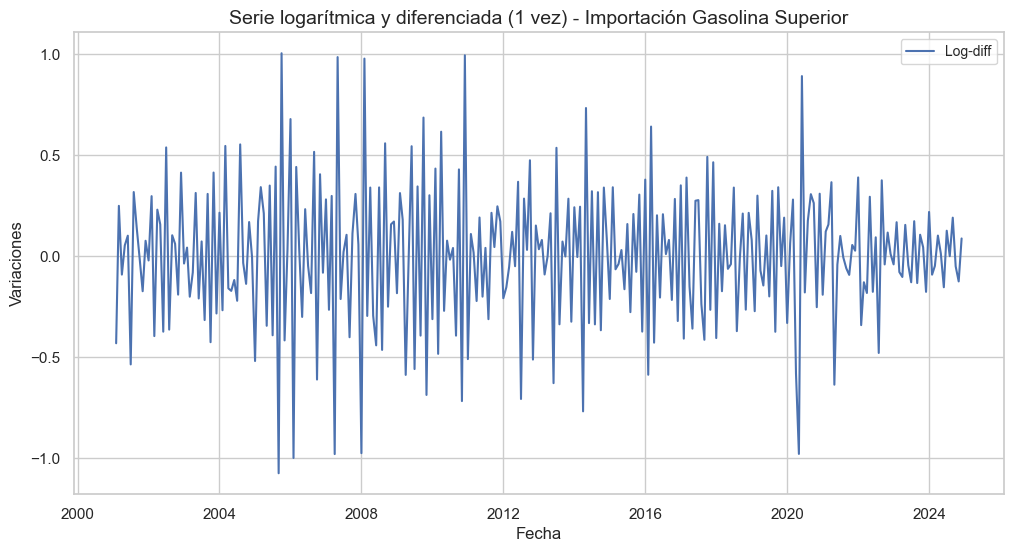

In [1071]:
plt.figure(figsize=(12,6))
plt.plot(serie_log_diff2, label='Log-diff')
plt.title("Serie logarítmica y diferenciada (1 vez) - Importación Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Variaciones")
plt.legend()
plt.show()

In [1072]:
# Seleccionamos la serie original
serie_diesel = df_importacion['Diesel alto azufre']
ultimo_mes_activo = serie_diesel[serie_diesel > 0].index[-1]
serie_diesel_activa = serie_diesel.loc[:ultimo_mes_activo]
serie_log = np.log(serie_diesel_activa)


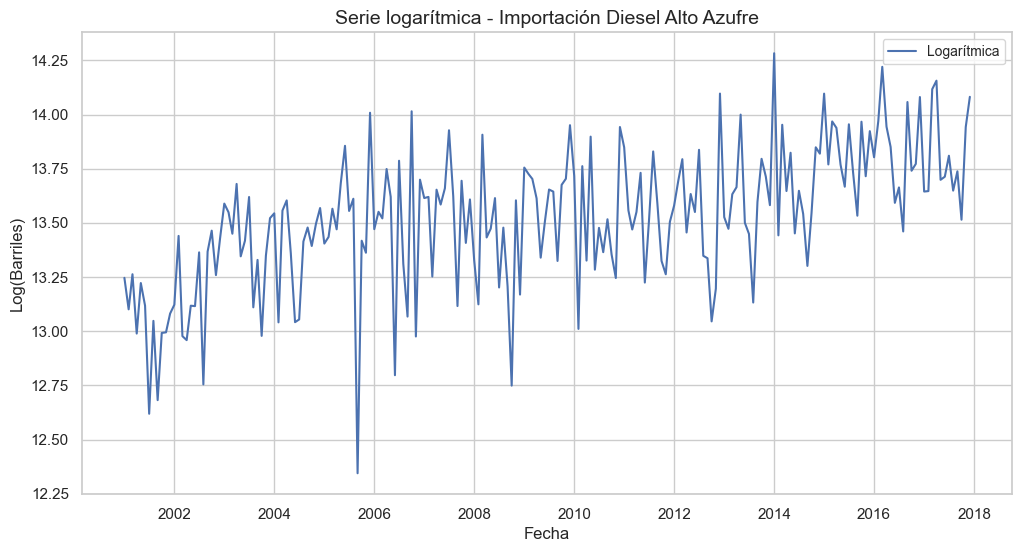

In [1073]:
plt.figure(figsize=(12,6))
plt.plot(serie_log, label='Logarítmica')
plt.title("Serie logarítmica - Importación Diesel Alto Azufre")
plt.xlabel("Fecha")
plt.ylabel("Log(Barriles)")
plt.legend()
plt.show()

In [1074]:
print("### ADF sobre serie logarítmica ###")
prueba_adf(serie_log)

### ADF sobre serie logarítmica ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba         -2.336655
p-value                        0.160418
# de retardos usados          11.000000
# de observaciones usadas    192.000000
Critical Value (1%)           -3.464875
Critical Value (5%)           -2.876714
Critical Value (10%)          -2.574859
dtype: float64


In [1075]:
serie_log_diff3 = serie_log.diff()
print("\n### ADF después de 1ra diferenciación ###")
prueba_adf(serie_log_diff3)


### ADF después de 1ra diferenciación ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba       -8.129429e+00
p-value                      1.100434e-12
# de retardos usados         1.000000e+01
# de observaciones usadas    1.920000e+02
Critical Value (1%)         -3.464875e+00
Critical Value (5%)         -2.876714e+00
Critical Value (10%)        -2.574859e+00
dtype: float64


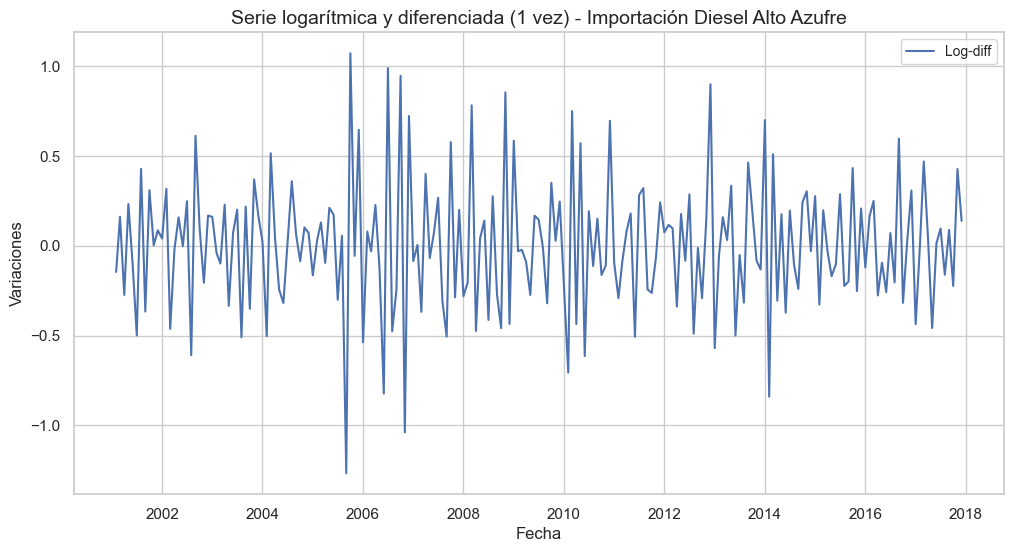

In [1076]:
plt.figure(figsize=(12,6))
plt.plot(serie_log_diff3, label='Log-diff')
plt.title("Serie logarítmica y diferenciada (1 vez) - Importación Diesel Alto Azufre")
plt.xlabel("Fecha")
plt.ylabel("Variaciones")
plt.legend()
plt.show()

Para estas 3 de importacion vamos a tener las 3 con un D de valor 1. 

#### Vamos a continuar ahora con consumo

Consumo Gasolina regular

In [1077]:
# Seleccionamos la serie original
serie_gasRegular = df_consumo['Gasolina regular']
serie_log = np.log(serie_gasRegular)

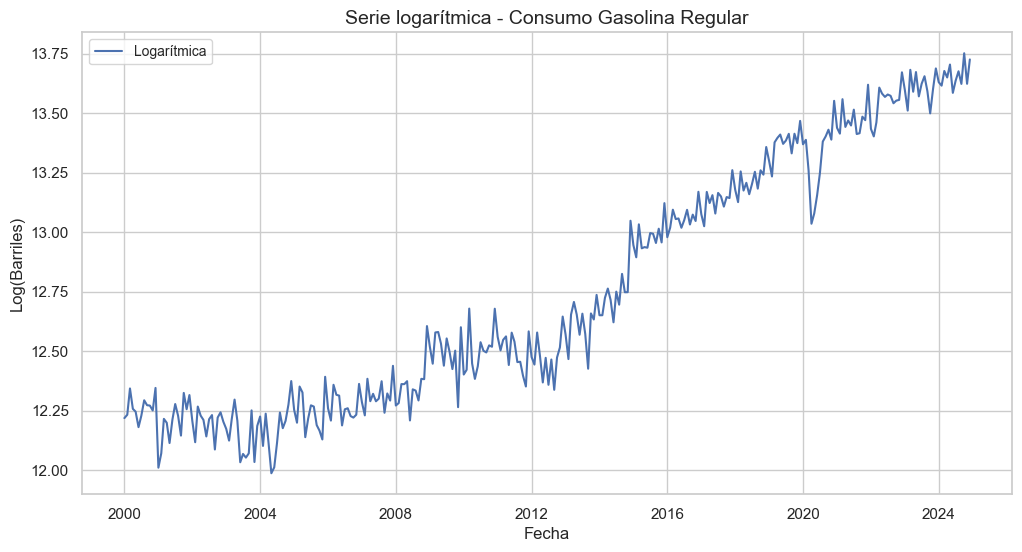

In [1078]:
plt.figure(figsize=(12,6))
plt.plot(serie_log, label='Logarítmica')
plt.title("Serie logarítmica - Consumo Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Log(Barriles)")
plt.legend()
plt.show()

In [1079]:
print("### ADF sobre serie logarítmica ###")
prueba_adf(serie_log)

### ADF sobre serie logarítmica ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba          0.850540
p-value                        0.992410
# de retardos usados          12.000000
# de observaciones usadas    287.000000
Critical Value (1%)           -3.453342
Critical Value (5%)           -2.871664
Critical Value (10%)          -2.572164
dtype: float64


In [1080]:
serie_log_diff4 = serie_log.diff()
print("\n### ADF después de 1ra diferenciación ###")
prueba_adf(serie_log_diff4)


### ADF después de 1ra diferenciación ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba         -4.477918
p-value                        0.000216
# de retardos usados          16.000000
# de observaciones usadas    282.000000
Critical Value (1%)           -3.453754
Critical Value (5%)           -2.871844
Critical Value (10%)          -2.572261
dtype: float64


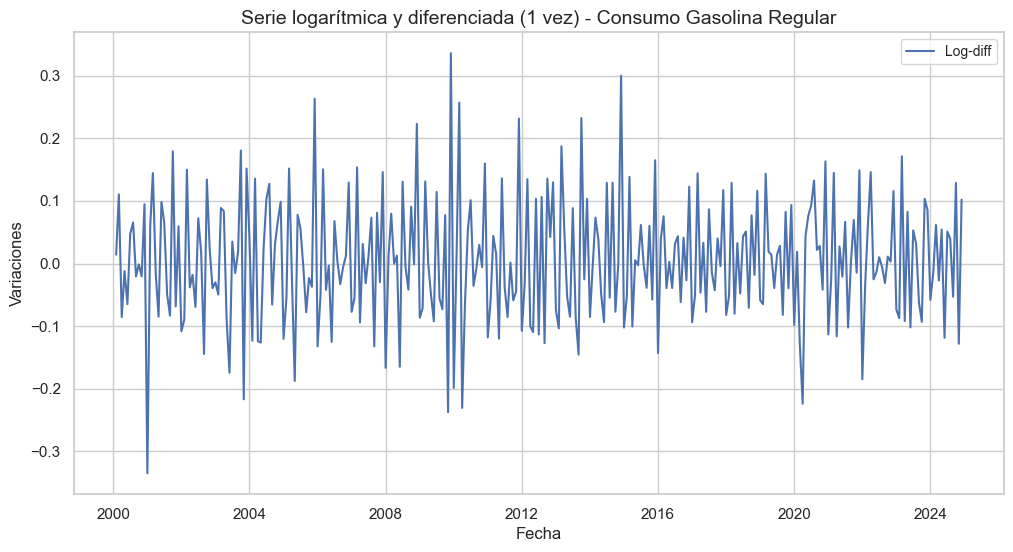

In [1081]:
plt.figure(figsize=(12,6))
plt.plot(serie_log_diff4, label='Log-diff')
plt.title("Serie logarítmica y diferenciada (1 vez) - Consumo Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Variaciones")
plt.legend()
plt.show()

COnsumo Gasolina Superior

In [1082]:
# Seleccionamos la serie original
serie_gasRegular = df_consumo['Gasolina superior']
serie_log = np.log(serie_gasRegular)

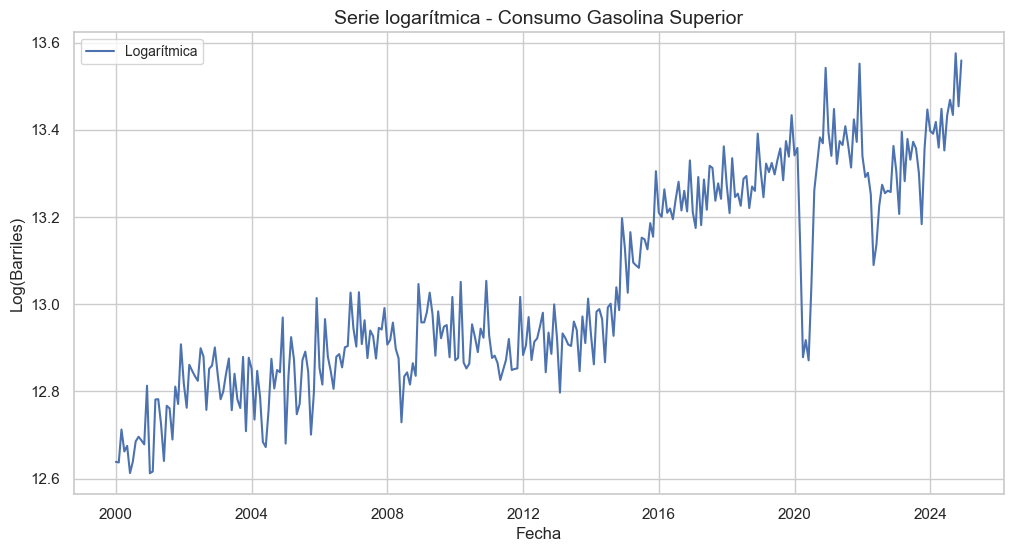

In [1083]:
plt.figure(figsize=(12,6))
plt.plot(serie_log, label='Logarítmica')
plt.title("Serie logarítmica - Consumo Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Log(Barriles)")
plt.legend()
plt.show()

In [1084]:
print("### ADF sobre serie logarítmica ###")
prueba_adf(serie_log)

### ADF sobre serie logarítmica ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba         -0.647666
p-value                        0.859844
# de retardos usados          12.000000
# de observaciones usadas    287.000000
Critical Value (1%)           -3.453342
Critical Value (5%)           -2.871664
Critical Value (10%)          -2.572164
dtype: float64


In [1085]:
serie_log_diff5 = serie_log.diff()
print("\n### ADF después de 1ra diferenciación ###")
prueba_adf(serie_log_diff5)


### ADF después de 1ra diferenciación ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba       -6.283927e+00
p-value                      3.737990e-08
# de retardos usados         1.100000e+01
# de observaciones usadas    2.870000e+02
Critical Value (1%)         -3.453342e+00
Critical Value (5%)         -2.871664e+00
Critical Value (10%)        -2.572164e+00
dtype: float64


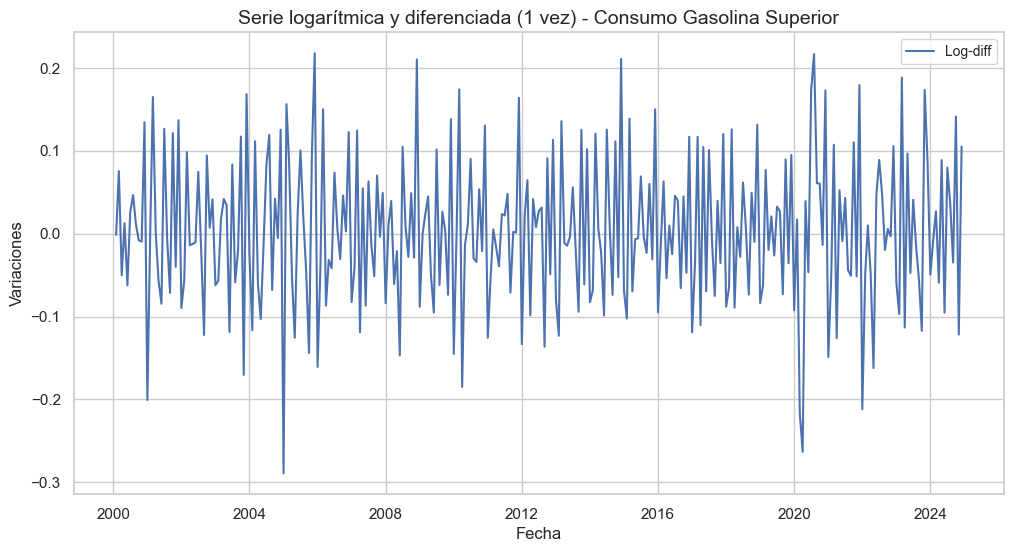

In [1086]:
plt.figure(figsize=(12,6))
plt.plot(serie_log_diff5, label='Log-diff')
plt.title("Serie logarítmica y diferenciada (1 vez) - Consumo Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Variaciones")
plt.legend()
plt.show()

Entonces tenemos un d de 1

Consumo de Diesel Alto Azufre

In [1087]:
# Seleccionamos la serie original
serie_diesel = df_consumo['Diesel alto azufre']
ultimo_mes_activo = serie_diesel[serie_diesel > 0].index[-1]
serie_diesel_activa = serie_diesel.loc[:ultimo_mes_activo]
serie_log = np.log(serie_diesel_activa)


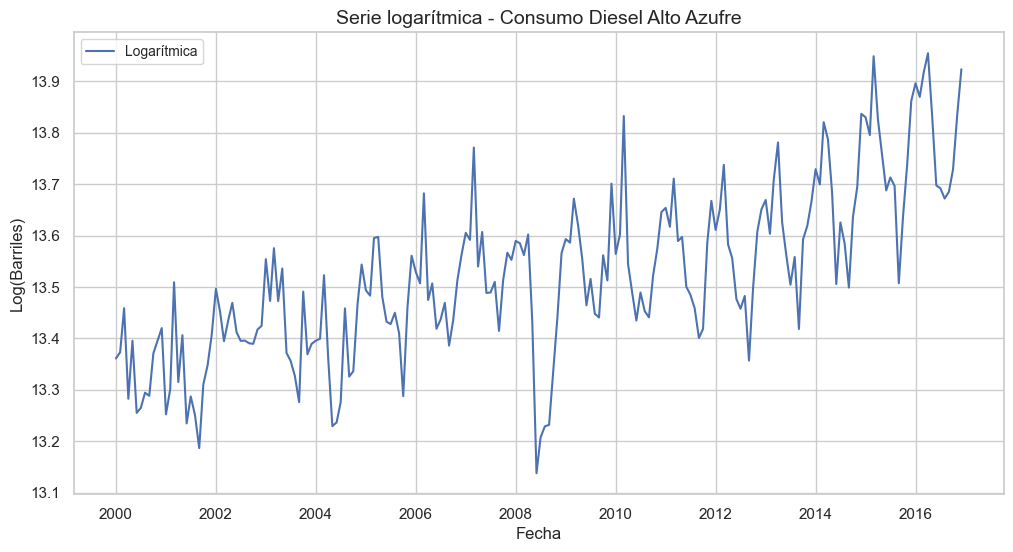

In [1088]:
plt.figure(figsize=(12,6))
plt.plot(serie_log, label='Logarítmica')
plt.title("Serie logarítmica - Consumo Diesel Alto Azufre")
plt.xlabel("Fecha")
plt.ylabel("Log(Barriles)")
plt.legend()
plt.show()

In [1089]:
print("### ADF sobre serie logarítmica ###")
prueba_adf(serie_log)

### ADF sobre serie logarítmica ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba         -0.341355
p-value                        0.919440
# de retardos usados          12.000000
# de observaciones usadas    191.000000
Critical Value (1%)           -3.465059
Critical Value (5%)           -2.876794
Critical Value (10%)          -2.574901
dtype: float64


In [1090]:
serie_log_diff6 = serie_log.diff()
print("\n### ADF después de 1ra diferenciación ###")
prueba_adf(serie_log_diff6)


### ADF después de 1ra diferenciación ###

Resultados de la prueba Dickey-Fuller:
Estadístico de prueba       -5.909917e+00
p-value                      2.653794e-07
# de retardos usados         1.100000e+01
# de observaciones usadas    1.910000e+02
Critical Value (1%)         -3.465059e+00
Critical Value (5%)         -2.876794e+00
Critical Value (10%)        -2.574901e+00
dtype: float64


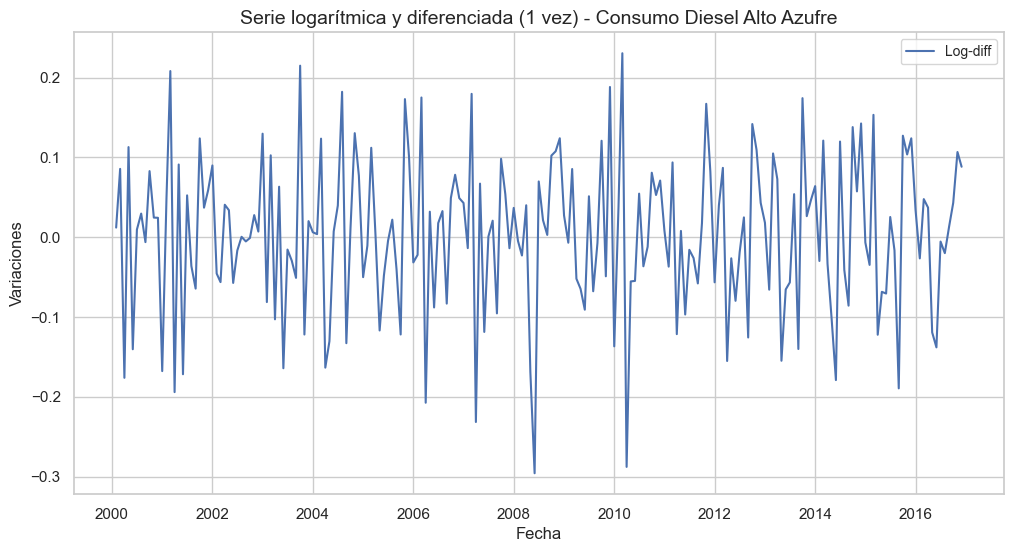

In [1091]:
plt.figure(figsize=(12,6))
plt.plot(serie_log_diff6, label='Log-diff')
plt.title("Serie logarítmica y diferenciada (1 vez) - Consumo Diesel Alto Azufre")
plt.xlabel("Fecha")
plt.ylabel("Variaciones")
plt.legend()
plt.show()

Para todos llegamos a un d de uno

Para preparar las series de tiempo para su modelado, realizamos una serie de transformaciones necesarias para garantizar que cumplan con las condiciones de estacionariedad requeridas por los modelos ARIMA/SARIMA. En primer lugar, aplicamos una transformación logarítmica a cada serie para estabilizar la varianza, ya que observamos que las fluctuaciones crecían a medida que los valores aumentaban. Luego, para eliminar la tendencia en la media, diferenciamos las series una vez (log-diff), lo cual permitió que las series oscilaran alrededor de un valor constante en lugar de mostrar un crecimiento sostenido. Para confirmar que la serie ya era estacionaria en media después de cada transformación, aplicamos la prueba de Dickey-Fuller aumentada (ADF), evaluando el p-value para comprobar si podíamos rechazar la hipótesis nula de no estacionariedad. Todas las series resultaron estacionarias con una sola diferenciación (d=1). Con esto, obtuvimos series limpias, con media y varianza estables, listas para proceder al siguiente paso: analizar las funciones de autocorrelación (FAC) y autocorrelación parcial (FACP).

| Gráfica     | Qué componente |
| ----------- | -------------- |
| FACP (PACF) | AR (elige `p`) |
| FAC (ACF)   | MA (elige `q`) |


La zona azul es la banda de confianza al 95% (por defecto).

Representa el rango en el que esperamos que las autocorrelaciones sean cero, si la serie fuera puramente ruido blanco.

Es decir: si la serie no tuviera ningún patrón (ruido puro), todas las barras deberían caer dentro de la zona azul.

### Importacion

Gasolina regular

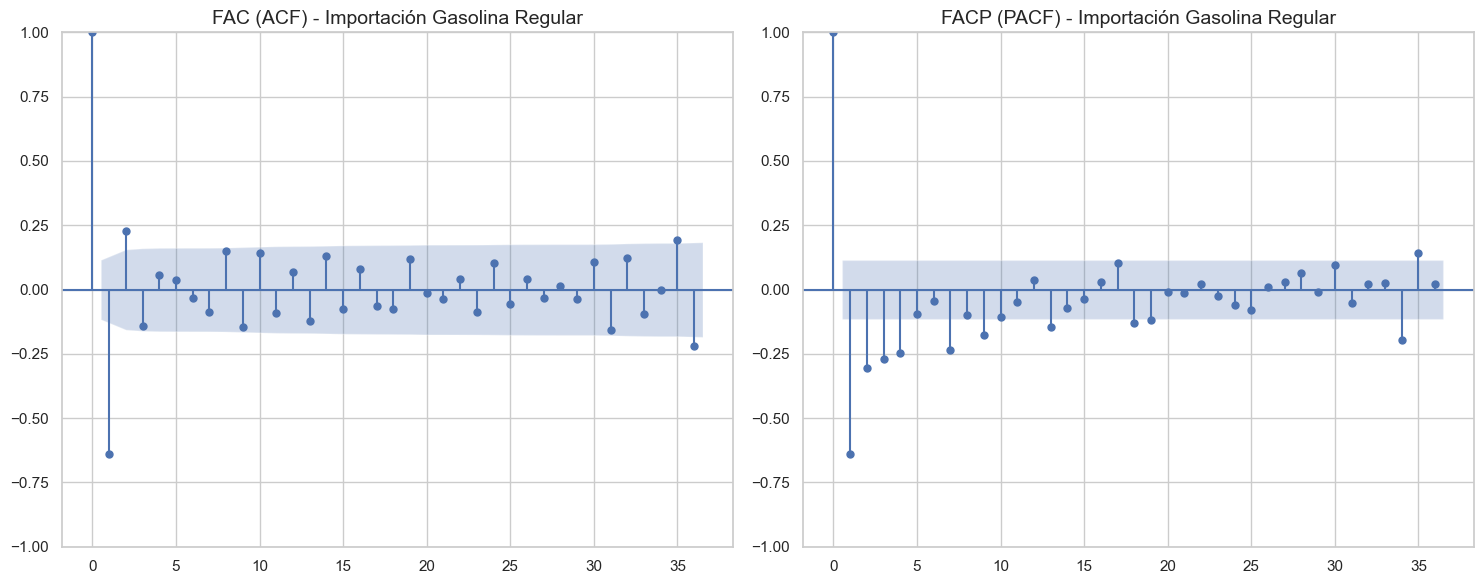

In [1092]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15,6))

# FAC (ACF)
plt.subplot(1,2,1)
plot_acf(serie_log_diff1.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FAC (ACF) - Importación Gasolina Regular")

# FACP (PACF)
plt.subplot(1,2,2)
plot_pacf(serie_log_diff1.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FACP (PACF) - Importación Gasolina Regular")

plt.tight_layout()
plt.show()


En FACP (AR), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago explica una dependencia significativa → p=1.

En FAC (MA), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago de los errores explica una dependencia significativa → q=1.

Gasolina superior

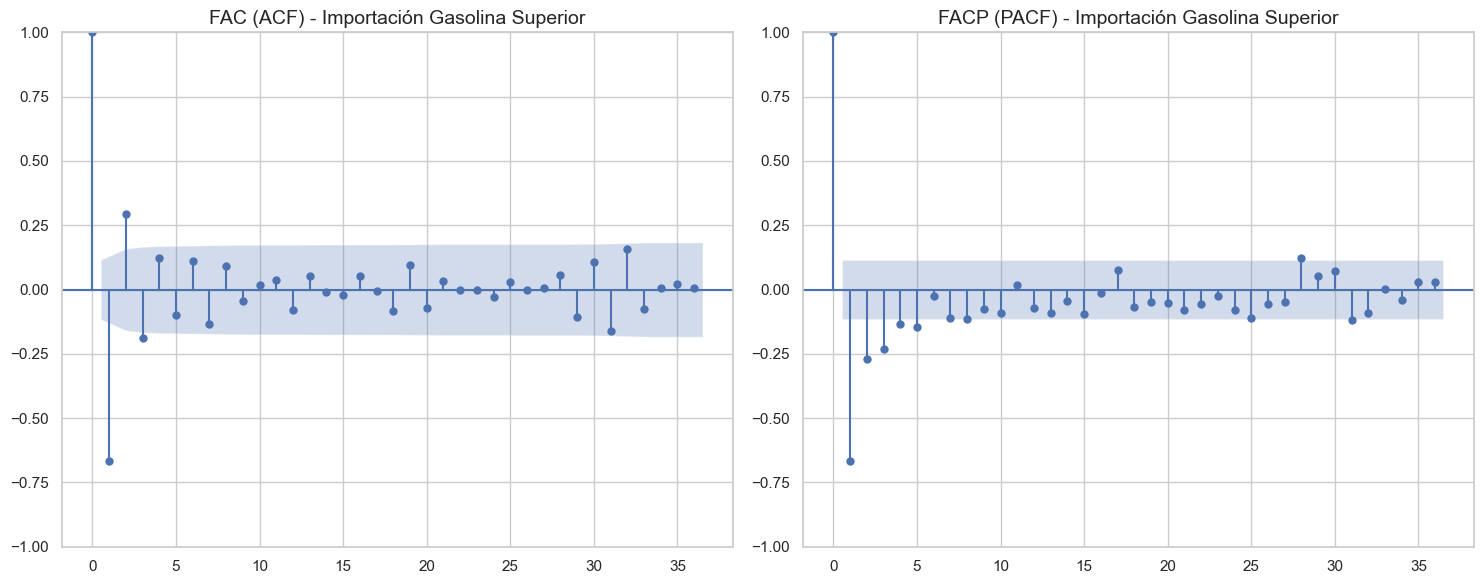

In [1093]:
# Importación - Gasolina superior
plt.figure(figsize=(15,6))

# FAC (ACF)
plt.subplot(1,2,1)
plot_acf(serie_log_diff2.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FAC (ACF) - Importación Gasolina Superior")

# FACP (PACF)
plt.subplot(1,2,2)
plot_pacf(serie_log_diff2.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FACP (PACF) - Importación Gasolina Superior")

plt.tight_layout()
plt.show()


En FACP (AR), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago explica una dependencia significativa → p=1.

En FAC (MA), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago de los errores explica una dependencia significativa → q=1.

Diesel Alto Azufre

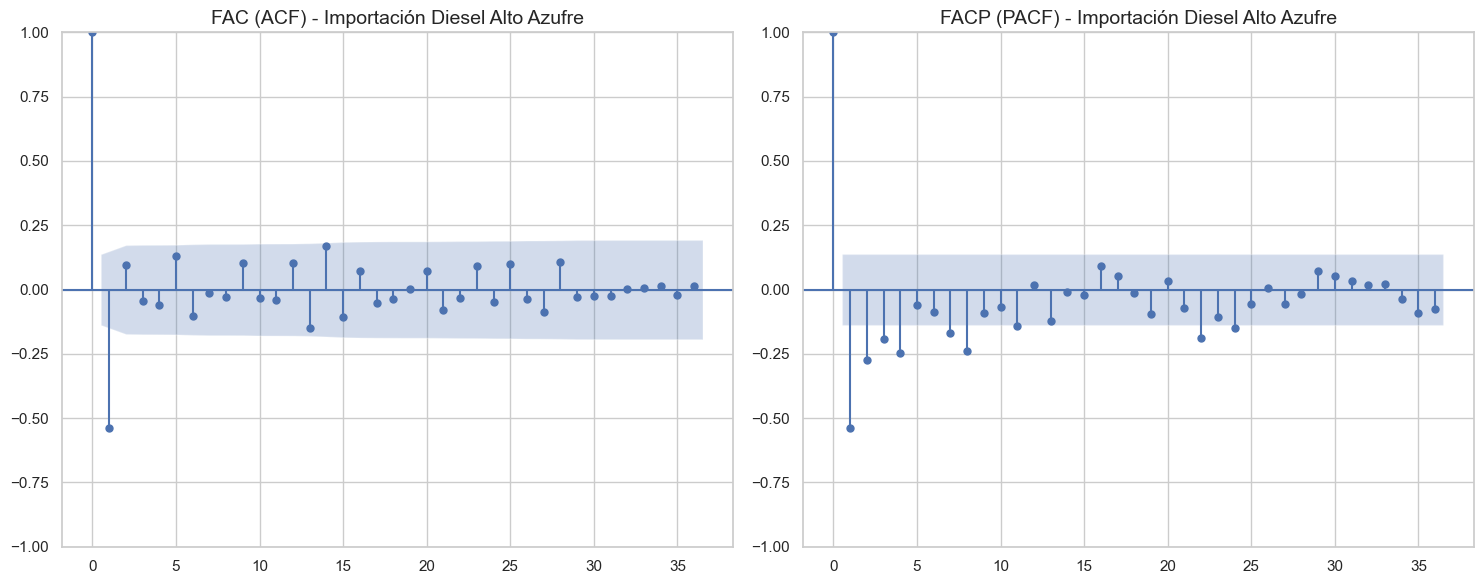

In [1094]:
# Importación - Diesel alto azufre
plt.figure(figsize=(15,6))

# FAC (ACF)
plt.subplot(1,2,1)
plot_acf(serie_log_diff3.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FAC (ACF) - Importación Diesel Alto Azufre")

# FACP (PACF)
plt.subplot(1,2,2)
plot_pacf(serie_log_diff3.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FACP (PACF) - Importación Diesel Alto Azufre")

plt.tight_layout()
plt.show()


En FACP (AR), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago explica una dependencia significativa → p=1.

En FAC (MA), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago de los errores explica una dependencia significativa → q=1.

### Consumo

Gasolina Regular

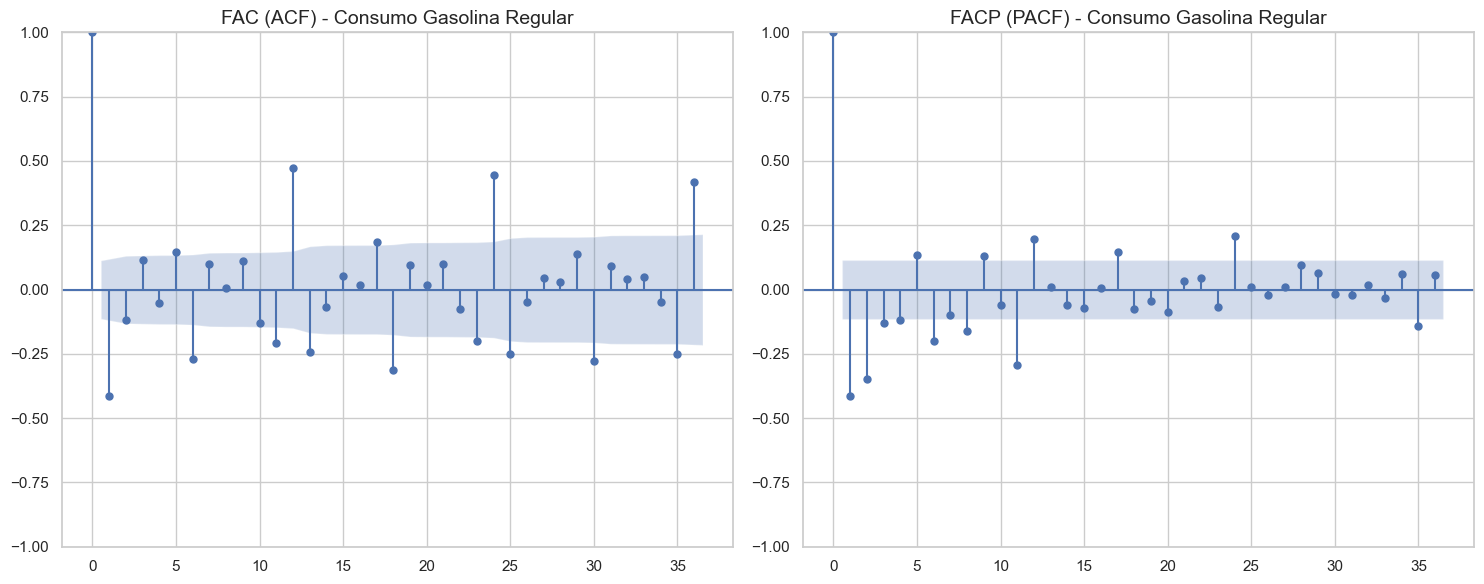

In [1095]:
# Consumo - Gasolina regular
plt.figure(figsize=(15,6))

# FAC (ACF)
plt.subplot(1,2,1)
plot_acf(serie_log_diff4.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FAC (ACF) - Consumo Gasolina Regular")

# FACP (PACF)
plt.subplot(1,2,2)
plot_pacf(serie_log_diff4.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FACP (PACF) - Consumo Gasolina Regular")

plt.tight_layout()
plt.show()

En FACP (AR), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago explica una dependencia significativa → p=1.

En FAC (MA), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago de los errores explica una dependencia significativa → q=1.

Gasolina superior

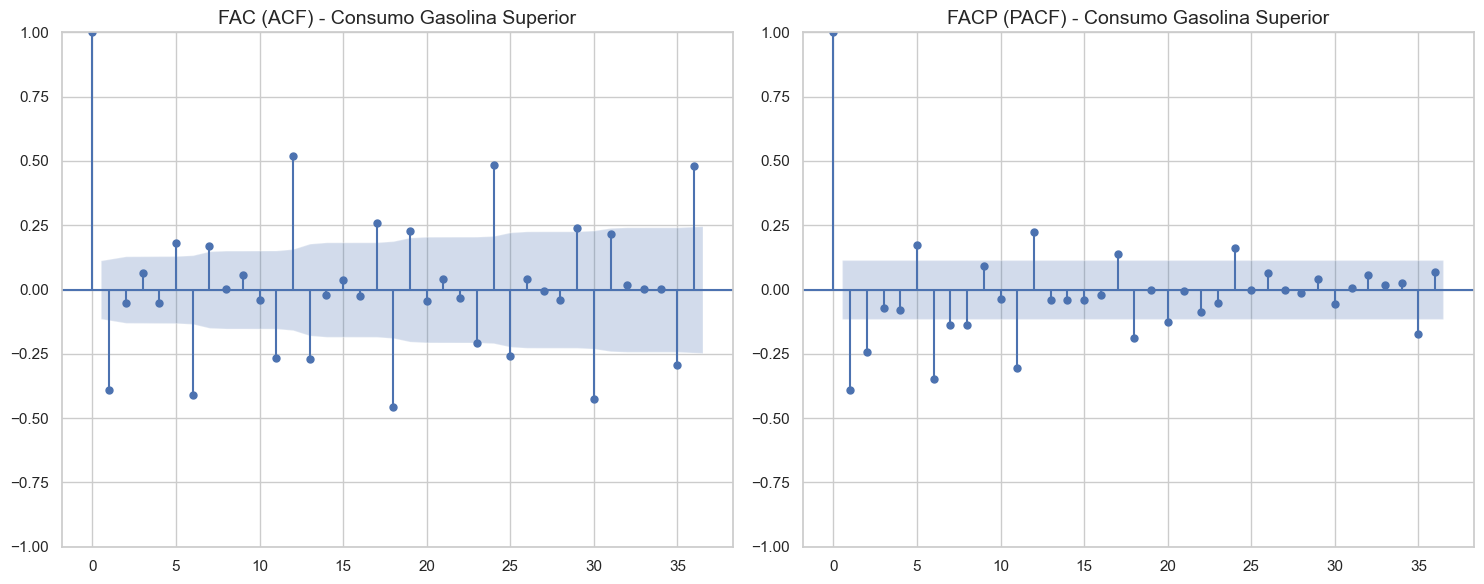

In [1096]:
# Consumo - Gasolina superior
plt.figure(figsize=(15,6))

# FAC (ACF)
plt.subplot(1,2,1)
plot_acf(serie_log_diff5.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FAC (ACF) - Consumo Gasolina Superior")

# FACP (PACF)
plt.subplot(1,2,2)
plot_pacf(serie_log_diff5.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FACP (PACF) - Consumo Gasolina Superior")

plt.tight_layout()
plt.show()

En FACP (AR), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago explica una dependencia significativa → p=1.

En FAC (MA), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago de los errores explica una dependencia significativa → q=1.

Diesel Alto Azufre

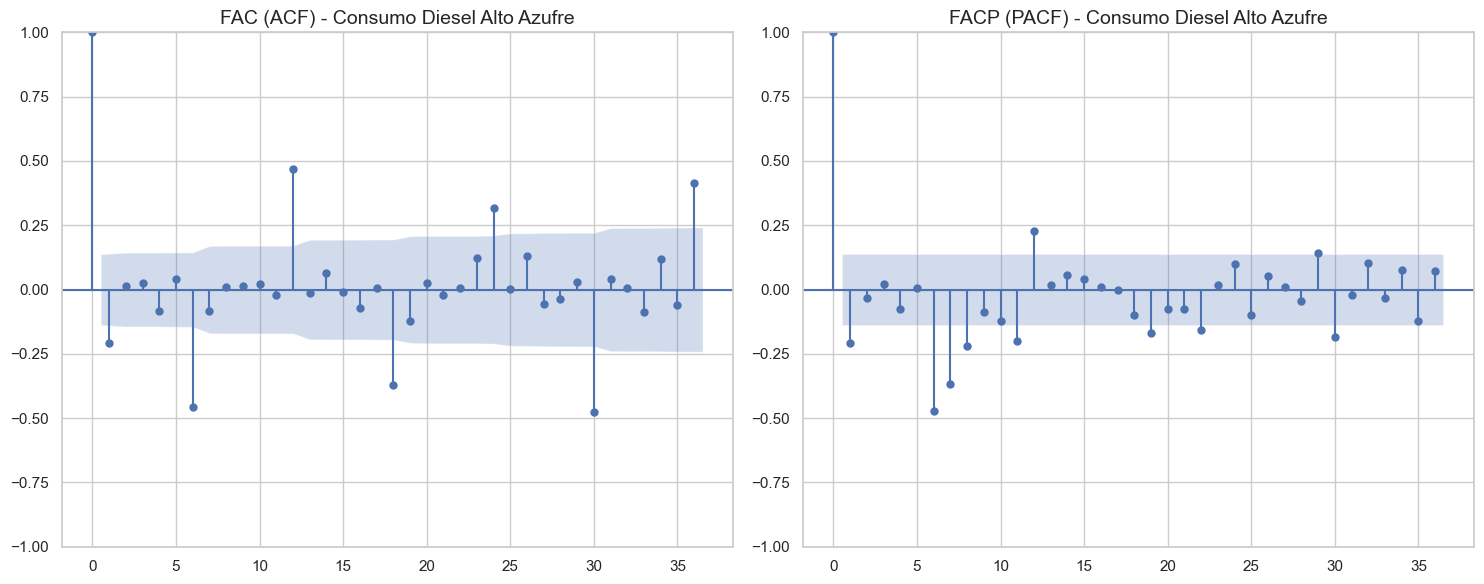

In [1097]:
# Consumo - Diesel alto azufre
plt.figure(figsize=(15,6))

# FAC (ACF)
plt.subplot(1,2,1)
plot_acf(serie_log_diff6.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FAC (ACF) - Consumo Diesel Alto Azufre")

# FACP (PACF)
plt.subplot(1,2,2)
plot_pacf(serie_log_diff6.dropna(), lags=36, ax=plt.gca(), alpha=0.05)
plt.title("FACP (PACF) - Consumo Diesel Alto Azufre")

plt.tight_layout()
plt.show()


En FACP (AR), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago explica una dependencia significativa → p=1.

En FAC (MA), sólo la barra del rezago 1 está claramente fuera → implica que sólo el primer rezago de los errores explica una dependencia significativa → q=1.

Como interpretar estos? 
| Situación                                    | Significado                              |
| -------------------------------------------- | ---------------------------------------- |
| Todas las barras dentro de la zona azul      | Serie ≈ ruido blanco                     |
| Una o más barras fuera (y luego caen dentro) | Dependencia hasta ese rezago             |
| Muchas barras fuera y no caen                | Serie mal transformada (no estacionaria) |


Durante el análisis exploratorio y la descomposición, las series mostraron una tendencia clara y estacionalidad leve, pero no un patrón estacional fuerte y dominante. La estacionalidad aparente se explicó mayormente por la tendencia y las fluctuaciones normales de la demanda, y fue suficientemente bien capturada mediante una diferenciación y componentes AR y MA simples. Por lo tanto, no fue necesario incluir explícitamente un término estacional (S) como lo haría un SARIMA.

In [1098]:
from statsmodels.tsa.arima.model import ARIMA
# Serie original (logarítmica)
serie_log = np.log(df_importacion['Gasolina regular'])

# Entrenar ARIMA(1,1,1)
modelo = ARIMA(serie_log, order=(1,1,1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:       Gasolina regular   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -21.640
Date:                Sat, 19 Jul 2025   AIC                             49.280
Time:                        15:04:50   BIC                             60.258
Sample:                    01-01-2001   HQIC                            53.680
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2539      0.059     -4.287      0.000      -0.370      -0.138
ma.L1         -0.8268      0.035    -23.941      0.000      -0.894      -0.759
sigma2         0.0677      0.005     14.159      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC (Akaike Information Criterion): penaliza la complejidad y premia el buen ajuste. Más bajo = mejor.

BIC (Bayesian Information Criterion): penaliza aún más la complejidad. Más bajo = mejor.

HQIC: otro criterio intermedio.

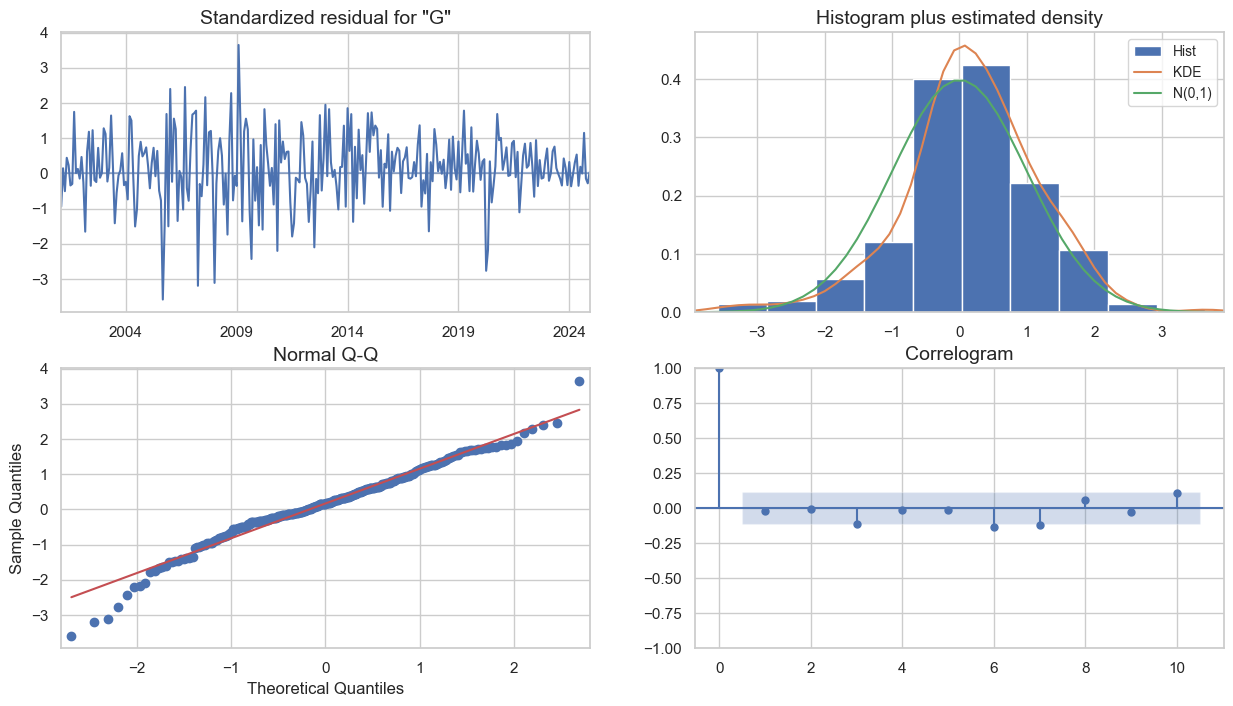

In [1099]:
# Diagnósticos de residuos
resultado.plot_diagnostics(figsize=(15,8))
plt.show()

- Arriba izquierda: residuos estandarizados a lo largo del tiempo.  Se ven distribuidos alrededor de 0 → bien.
- Arriba derecha: histograma + densidad. parece a una distribución normal → bien.
-  Abajo izquierda: Q-Q plot (normalidad). Los puntos siguen bastante bien la línea roja → residuos casi normales → bien.
- Abajo derecha: correlograma de residuos (ACF).  Ningún rezago significativo → residuos son ruido blanco → bien.

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


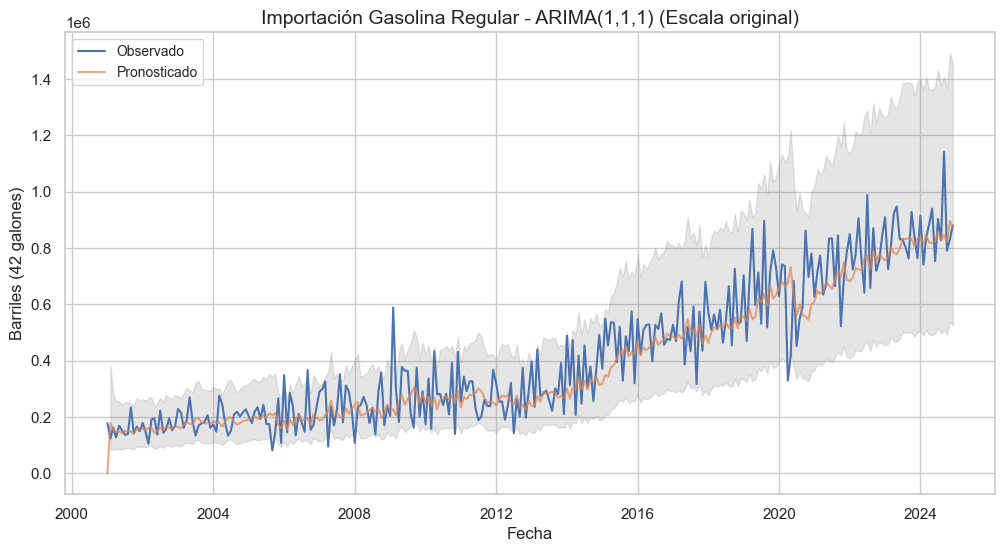

In [1100]:
# Predicciones dentro de la muestra
pred = resultado.get_prediction(start=serie_log.index[0], end=serie_log.index[-1], dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))

# Observado en escala original
plt.plot(np.exp(serie_log), label='Observado')

# Pronosticado en escala original
plt.plot(np.exp(pred.predicted_mean), label='Pronosticado', alpha=0.7)

# Intervalos de confianza en escala original
pred_ci_exp = np.exp(pred_ci)

plt.fill_between(pred_ci_exp.index,
                 pred_ci_exp.iloc[:,0],
                 pred_ci_exp.iloc[:,1], color='gray', alpha=0.2)

plt.title("Importación Gasolina Regular - ARIMA(1,1,1) (Escala original)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


El modelo ARIMA(1,1,1):

    Sigue bien la tendencia general de la serie (creciente).

    Captura bastante bien la estacionalidad y las oscilaciones pequeñas.

    Las predicciones son más suaves que los datos reales, porque ARIMA tiende a suavizar ruidos de corto plazo.

    Los picos y caídas más extremos no siempre son bien predichos, lo cual es normal en series económicas. 

    Tambien mas que era normal no predice tanto el bajon que tuvo la pandemia por ser algo atipico que paso en el mundo

El modelo ARIMA(1,1,1) ajusta adecuadamente la serie de Importación de Gasolina Regular, capturando la tendencia creciente y parte de la estacionalidad observada. La mayoría de los valores reales permanecen dentro del intervalo de confianza del 95%, indicando que el modelo es robusto para predicciones dentro de la muestra, aunque suaviza los picos y caídas más abruptos, propios de la naturaleza económica de la serie.

In [1101]:
# Serie original (logarítmica)
serie_log = np.log(df_importacion['Gasolina superior'])

# Entrenar ARIMA(1,1,1)
modelo = ARIMA(serie_log, order=(1,1,1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   7.257
Date:                Sat, 19 Jul 2025   AIC                             -8.514
Time:                        15:04:51   BIC                              2.465
Sample:                    01-01-2001   HQIC                            -4.114
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2523      0.063     -3.981      0.000      -0.376      -0.128
ma.L1         -0.8008      0.039    -20.611      0.000      -0.877      -0.725
sigma2         0.0554      0.003     18.738      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


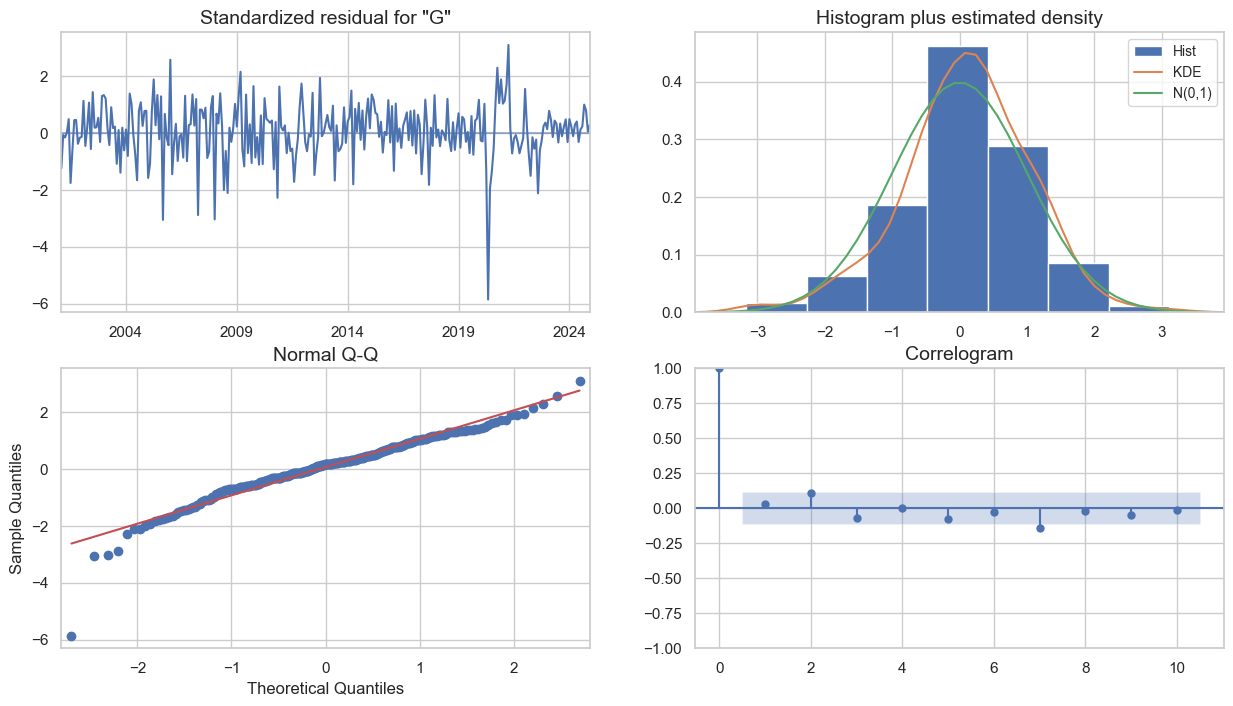

In [1102]:
# Diagnósticos de residuos
resultado.plot_diagnostics(figsize=(15,8))
plt.show()

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


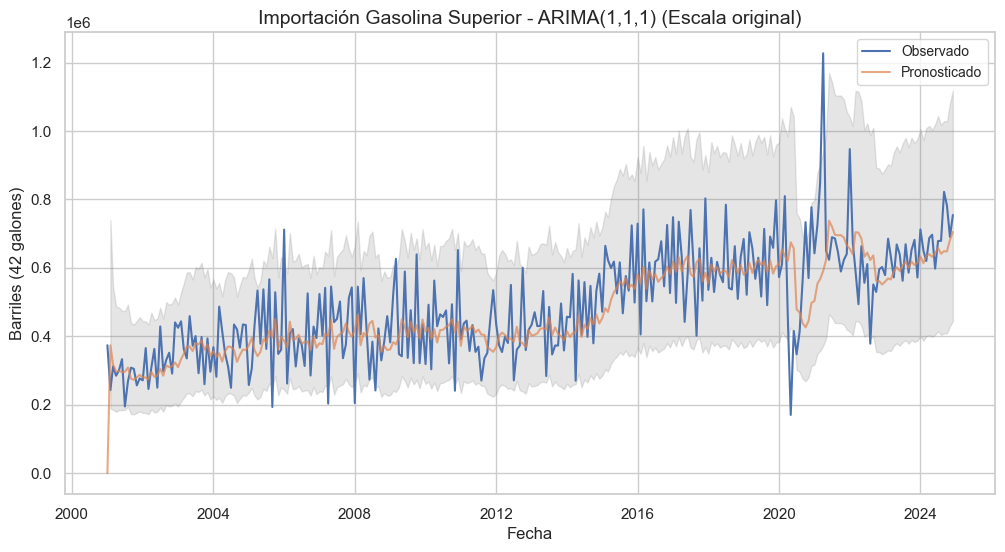

In [1103]:
# Predicciones dentro de la muestra
pred = resultado.get_prediction(start=serie_log.index[0], end=serie_log.index[-1], dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))

# Observado en escala original
plt.plot(np.exp(serie_log), label='Observado')

# Pronosticado en escala original
plt.plot(np.exp(pred.predicted_mean), label='Pronosticado', alpha=0.7)

# Intervalos de confianza en escala original
pred_ci_exp = np.exp(pred_ci)

plt.fill_between(pred_ci_exp.index,
                 pred_ci_exp.iloc[:,0],
                 pred_ci_exp.iloc[:,1], color='gray', alpha=0.2)

plt.title("Importación Gasolina Superior - ARIMA(1,1,1) (Escala original)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


In [1104]:
# Serie original (logarítmica)
serie_diesel = df_importacion['Diesel alto azufre']
ultimo_mes_activo = serie_diesel[serie_diesel > 0].index[-1]
serie_diesel_activa = serie_diesel.loc[:ultimo_mes_activo]
serie_log = np.log(serie_diesel_activa)

# Entrenar ARIMA(1,1,1)
modelo = ARIMA(serie_log, order=(1,1,1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:     Diesel alto azufre   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -20.509
Date:                Sat, 19 Jul 2025   AIC                             47.019
Time:                        15:04:52   BIC                             56.958
Sample:                    01-01-2001   HQIC                            51.040
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0253      0.091     -0.279      0.780      -0.203       0.152
ma.L1         -0.8971      0.037    -24.365      0.000      -0.969      -0.825
sigma2         0.0711      0.006     11.080      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


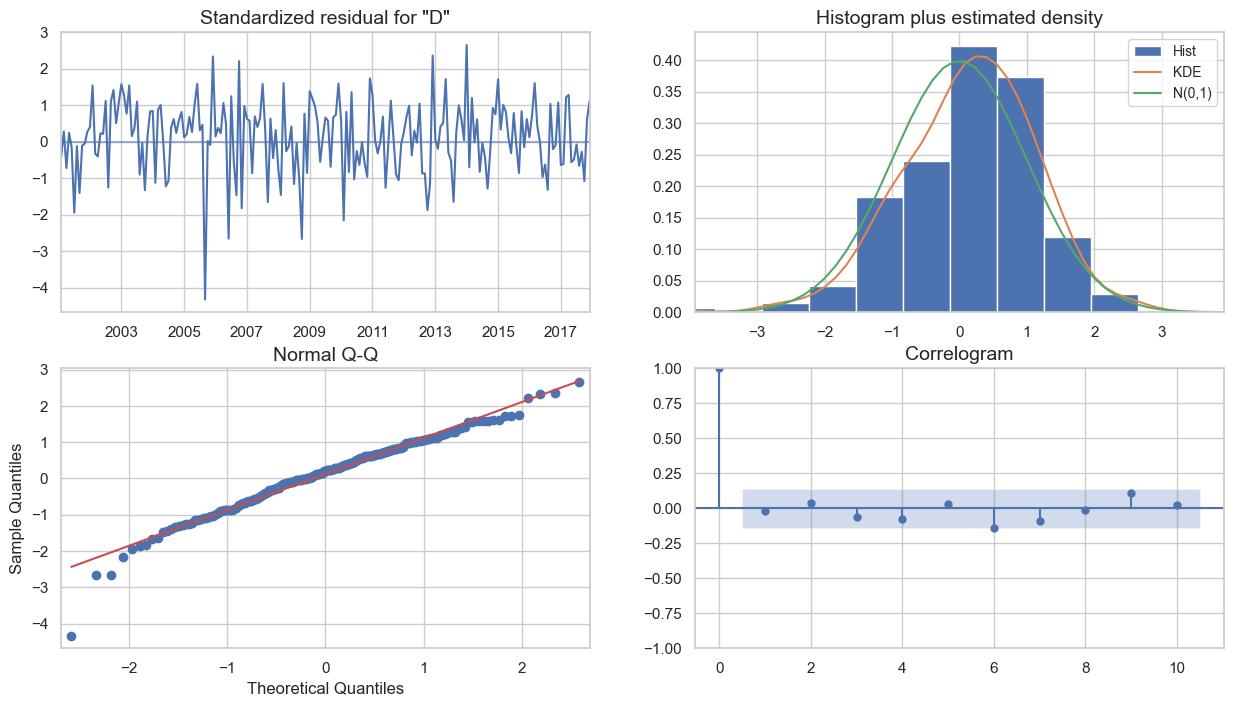

In [1105]:
# Diagnósticos de residuos
resultado.plot_diagnostics(figsize=(15,8))
plt.show()

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


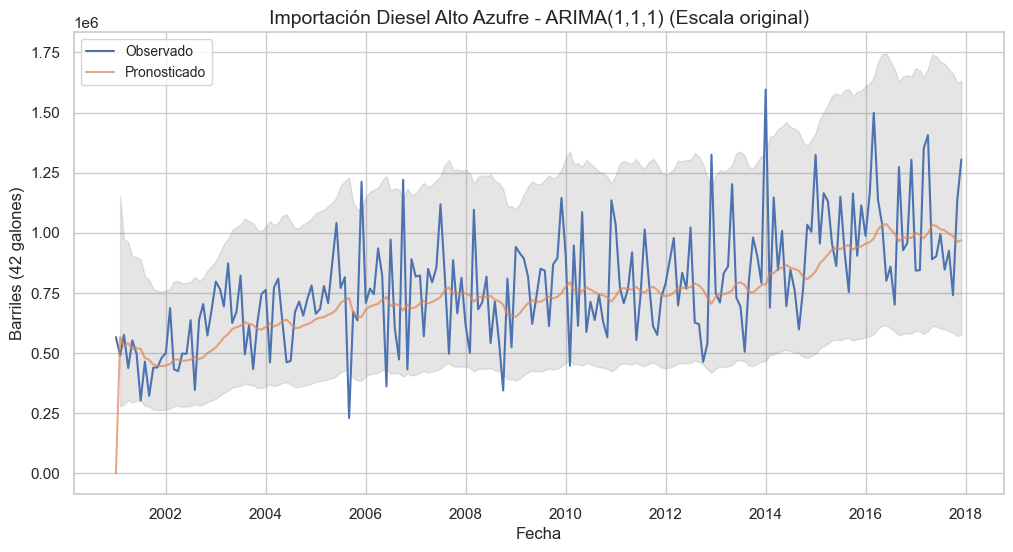

In [1106]:
# Predicciones dentro de la muestra
pred = resultado.get_prediction(start=serie_log.index[0], end=serie_log.index[-1], dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))

# Observado en escala original
plt.plot(np.exp(serie_log), label='Observado')

# Pronosticado en escala original
plt.plot(np.exp(pred.predicted_mean), label='Pronosticado', alpha=0.7)

# Intervalos de confianza en escala original
pred_ci_exp = np.exp(pred_ci)

plt.fill_between(pred_ci_exp.index,
                 pred_ci_exp.iloc[:,0],
                 pred_ci_exp.iloc[:,1], color='gray', alpha=0.2)

plt.title("Importación Diesel Alto Azufre - ARIMA(1,1,1) (Escala original)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


In [1107]:
# Serie original (logarítmica)
serie_log = np.log(df_consumo['Gasolina regular'])

# Entrenar ARIMA(1,1,1)
modelo = ARIMA(serie_log, order=(1,1,1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:       Gasolina regular   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 314.348
Date:                Sat, 19 Jul 2025   AIC                           -622.696
Time:                        15:04:53   BIC                           -611.595
Sample:                    01-01-2000   HQIC                          -618.253
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0322      0.089      0.360      0.719      -0.143       0.207
ma.L1         -0.6411      0.072     -8.965      0.000      -0.781      -0.501
sigma2         0.0071      0.000     15.033      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


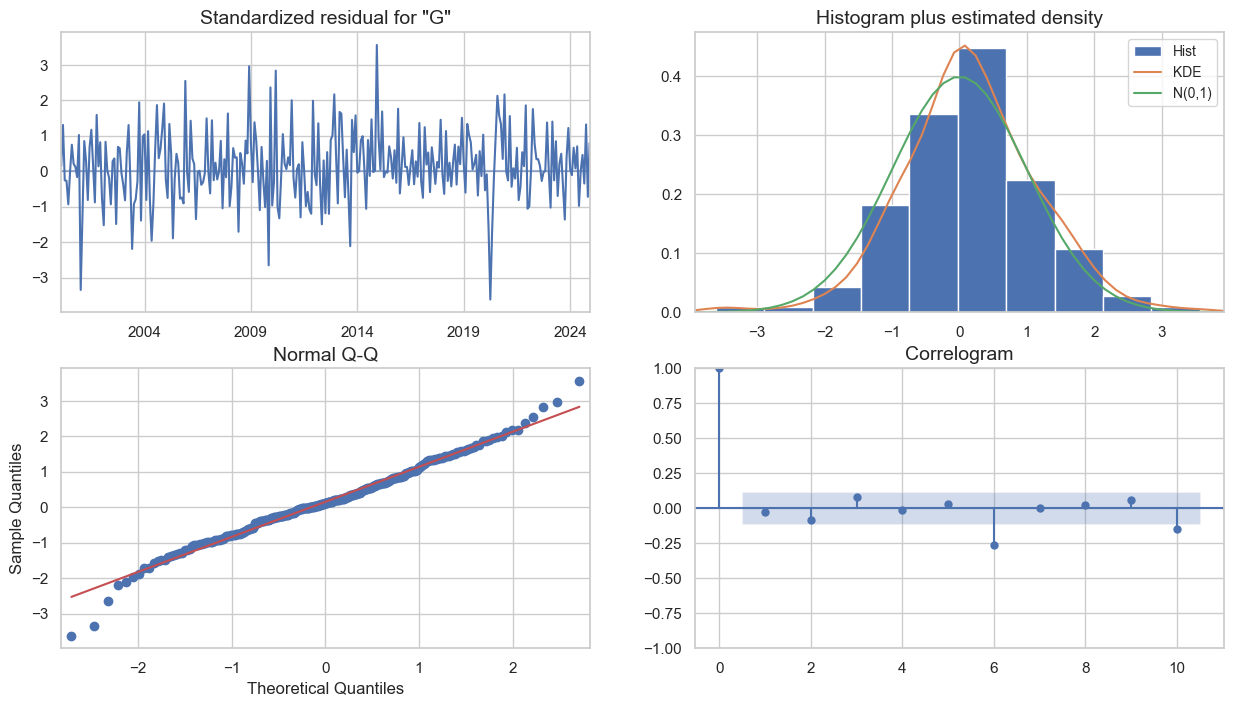

In [1108]:
# Diagnósticos de residuos
resultado.plot_diagnostics(figsize=(15,8))
plt.show()

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


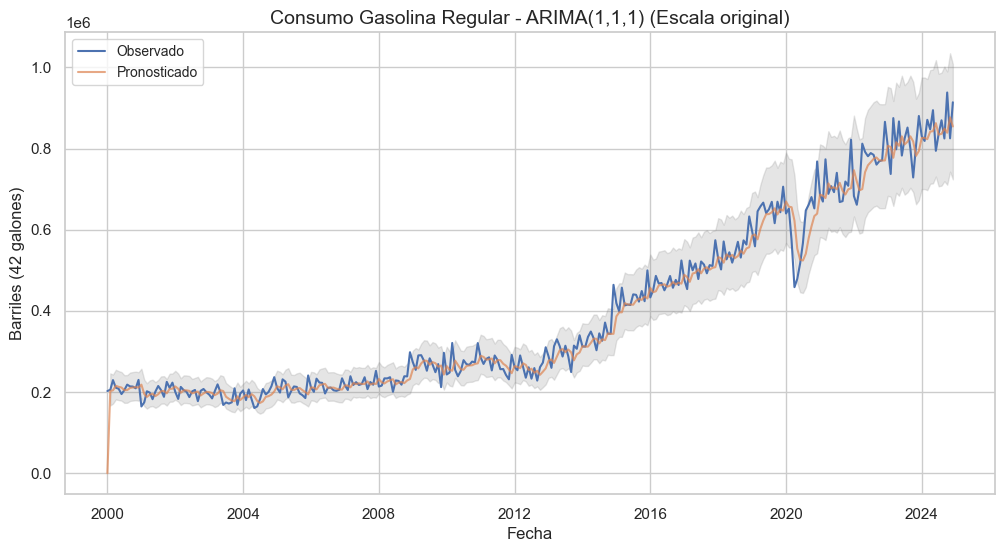

In [1109]:
# Predicciones dentro de la muestra
pred = resultado.get_prediction(start=serie_log.index[0], end=serie_log.index[-1], dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))

# Observado en escala original
plt.plot(np.exp(serie_log), label='Observado')

# Pronosticado en escala original
plt.plot(np.exp(pred.predicted_mean), label='Pronosticado', alpha=0.7)

# Intervalos de confianza en escala original
pred_ci_exp = np.exp(pred_ci)

plt.fill_between(pred_ci_exp.index,
                 pred_ci_exp.iloc[:,0],
                 pred_ci_exp.iloc[:,1], color='gray', alpha=0.2)

plt.title("Consumo Gasolina Regular - ARIMA(1,1,1) (Escala original)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


In [1110]:
from statsmodels.tsa.arima.model import ARIMA
# Serie original (logarítmica)
serie_log = np.log(df_consumo['Gasolina superior'])

# Entrenar ARIMA(1,1,1)
modelo = ARIMA(serie_log, order=(1,1,1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  300
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 334.750
Date:                Sat, 19 Jul 2025   AIC                           -663.500
Time:                        15:04:54   BIC                           -652.398
Sample:                    01-01-2000   HQIC                          -659.056
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2289      0.072      3.199      0.001       0.089       0.369
ma.L1         -0.7325      0.048    -15.272      0.000      -0.826      -0.638
sigma2         0.0062      0.000     14.518      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


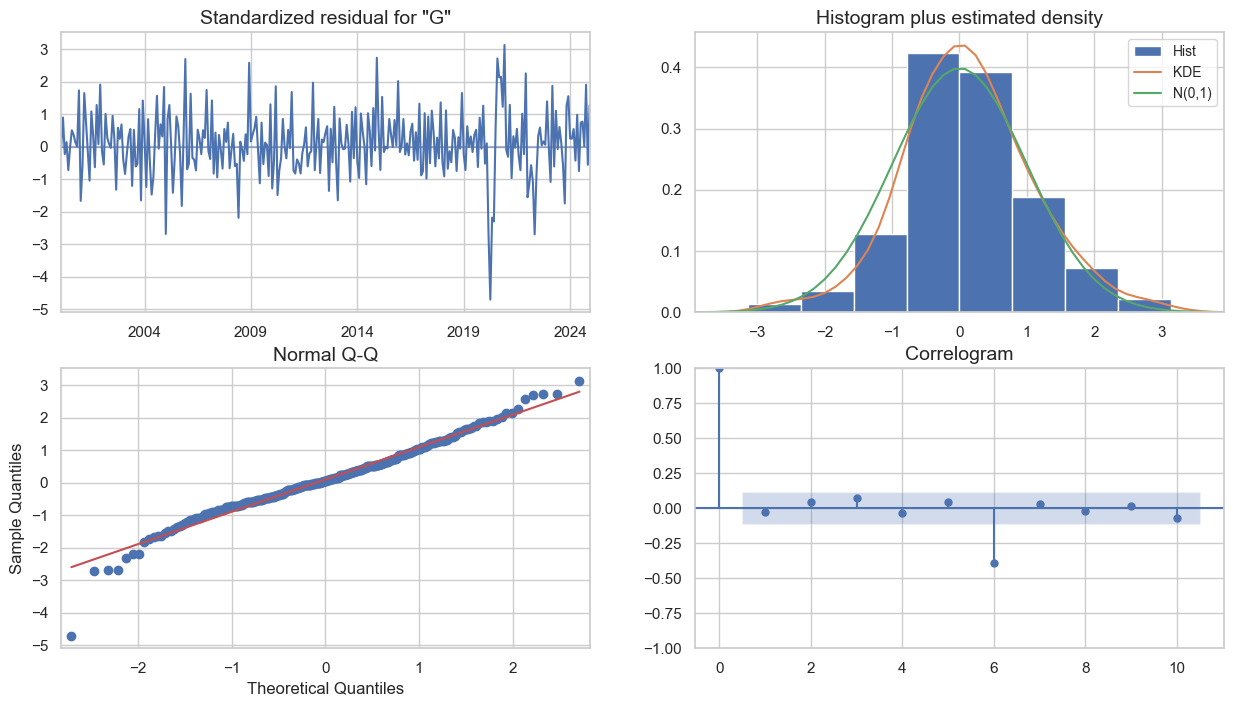

In [1111]:
# Diagnósticos de residuos
resultado.plot_diagnostics(figsize=(15,8))
plt.show()

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


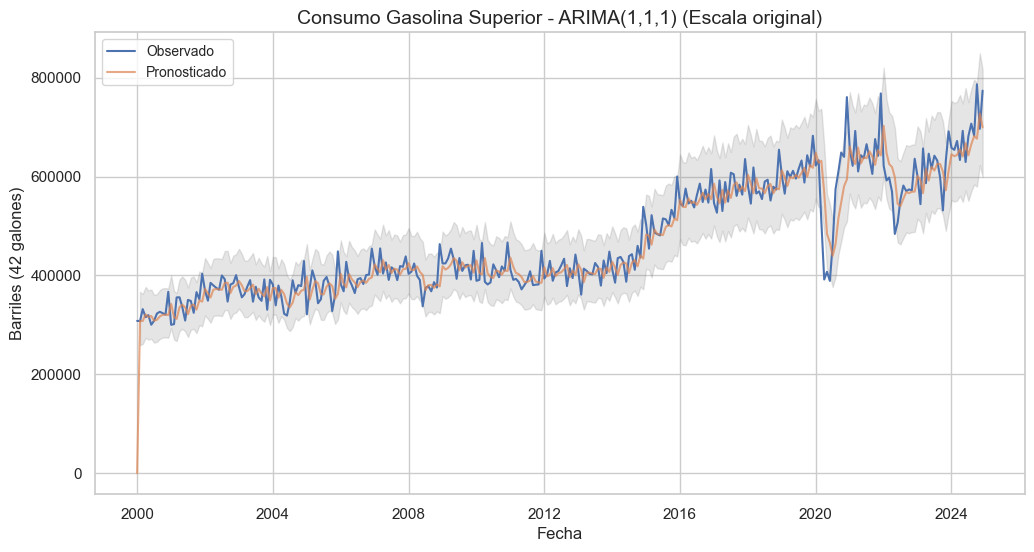

In [1112]:
# Predicciones dentro de la muestra
pred = resultado.get_prediction(start=serie_log.index[0], end=serie_log.index[-1], dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))

# Observado en escala original
plt.plot(np.exp(serie_log), label='Observado')

# Pronosticado en escala original
plt.plot(np.exp(pred.predicted_mean), label='Pronosticado', alpha=0.7)

# Intervalos de confianza en escala original
pred_ci_exp = np.exp(pred_ci)

plt.fill_between(pred_ci_exp.index,
                 pred_ci_exp.iloc[:,0],
                 pred_ci_exp.iloc[:,1], color='gray', alpha=0.2)

plt.title("Consumo Gasolina Superior - ARIMA(1,1,1) (Escala original)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


In [1113]:
# Serie original (logarítmica)
serie_diesel = df_consumo['Diesel alto azufre']
ultimo_mes_activo = serie_diesel[serie_diesel > 0].index[-1]
serie_diesel_activa = serie_diesel.loc[:ultimo_mes_activo]
serie_log = np.log(serie_diesel_activa)

# Entrenar ARIMA(1,1,1)
modelo = ARIMA(serie_log, order=(1,1,1))
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:     Diesel alto azufre   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 191.042
Date:                Sat, 19 Jul 2025   AIC                           -376.085
Time:                        15:04:55   BIC                           -366.145
Sample:                    01-01-2000   HQIC                          -372.064
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0665      0.402     -0.165      0.869      -0.855       0.722
ma.L1         -0.1479      0.410     -0.361      0.718      -0.951       0.656
sigma2         0.0089      0.001     10.094      0.0

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### COmo entender estos resultados ??  
Log Likelihood (LL): log-verosimilitud del modelo. Cuanto mayor (menos negativo), mejor.

AIC (Akaike Information Criterion): penaliza la complejidad y premia el ajuste. Cuanto más bajo, mejor.

BIC (Bayesian Information Criterion): penaliza aún más la complejidad que el AIC. Cuanto más bajo, mejor.

HQIC: criterio similar.

| Parámetro | Descripción                                                   |
| --------- | ------------------------------------------------------------- |
| `ar.L1`   | Coeficiente AR(1): efecto del valor anterior sobre el actual. |
| `ma.L1`   | Coeficiente MA(1): efecto del error anterior sobre el actual. |
| `sigma²`  | Varianza de los residuos. Cuanto más pequeña, mejor ajuste.   |

Cada parámetro incluye:

    coef: valor estimado del parámetro.

    std err: error estándar de la estimación.

    z: estadístico Z.

    P>|z|: p-valor → indica si el parámetro es significativamente distinto de 0. Si es <0.05, se considera significativo.

    [0.025, 0.975]: intervalo de confianza al 95% para el parámetro.

| Métrica                    | Interpretación                                                                                                                 |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Ljung-Box (Q)**          | Verifica autocorrelación en los residuos. Un p>0.05 indica que no hay autocorrelación significativa → residuos ≈ ruido blanco. |
| **Jarque-Bera (JB)**       | Verifica normalidad de los residuos. Un p>0.05 indica que los residuos son aproximadamente normales.                           |
| **Heteroskedasticity (H)** | Verifica si la varianza de los residuos es constante. Un p>0.05 indica homocedasticidad (deseable).                            |
| **Skew** y **Kurtosis**    | Medidas de asimetría y forma de la distribución de residuos. Cero es ideal, pequeñas desviaciones son aceptables.              |


Al evaluar un modelo, debes tener en cuenta:

    Que los coeficientes AR/MA sean significativos (p<0.05).

    Que los criterios AIC/BIC sean bajos en comparación a otros modelos probados.

    Que los residuos sean aproximadamente ruido blanco (Ljung-Box p>0.05).

    Que los residuos no tengan autocorrelación, sean aproximadamente normales y homocedásticos.

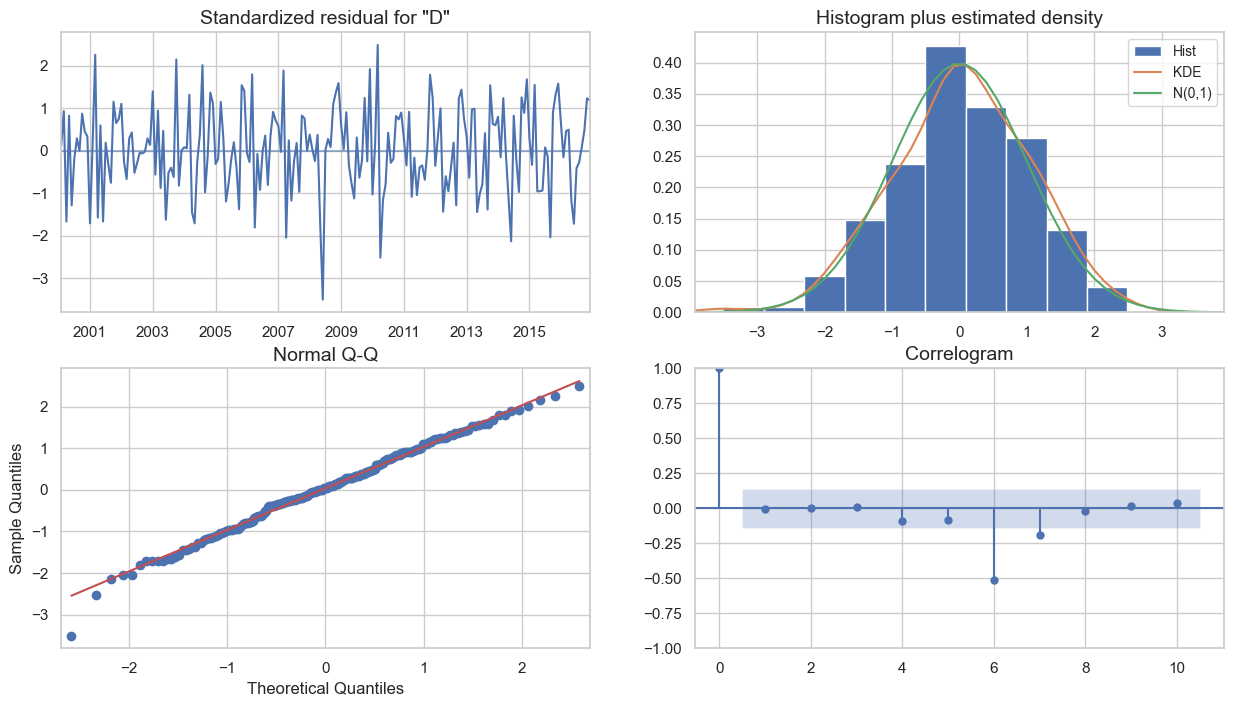

In [1114]:
# Diagnósticos de residuos
resultado.plot_diagnostics(figsize=(15,8))
plt.show()

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


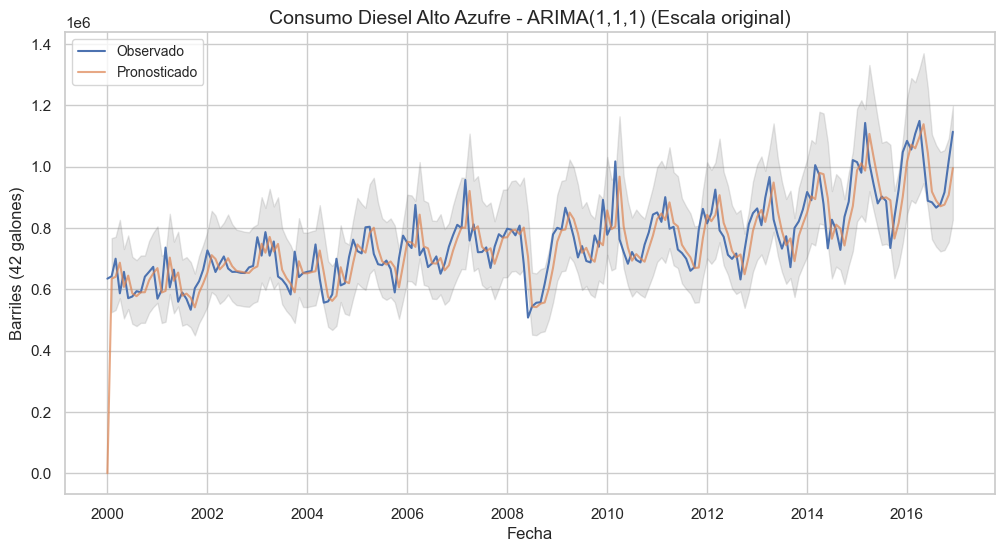

In [1115]:
# Predicciones dentro de la muestra
pred = resultado.get_prediction(start=serie_log.index[0], end=serie_log.index[-1], dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))

# Observado en escala original
plt.plot(np.exp(serie_log), label='Observado')

# Pronosticado en escala original
plt.plot(np.exp(pred.predicted_mean), label='Pronosticado', alpha=0.7)

# Intervalos de confianza en escala original
pred_ci_exp = np.exp(pred_ci)

plt.fill_between(pred_ci_exp.index,
                 pred_ci_exp.iloc[:,0],
                 pred_ci_exp.iloc[:,1], color='gray', alpha=0.2)

plt.title("Consumo Diesel Alto Azufre - ARIMA(1,1,1) (Escala original)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


Las series de consumo son más estables y predecibles
- Las series de consumo suelen mostrar un patrón más suave y continuo: crecen de forma relativamente estable, con menos interrupciones o decisiones abruptas.

- El consumo depende directamente del parque vehicular y la demanda interna → cambios graduales.

- Por eso, un modelo lineal simple como ARIMA capta bien la tendencia y la estacionalidad leve.

Las series de importación son más irregulares

- Las importaciones pueden variar bruscamente por decisiones políticas, compras anticipadas, cambios en proveedores, precios internacionales, etc.
- Hay meses con picos muy altos y otros muy bajos, incluso cuando el consumo es estable, porque los inventarios y reservas compensan la demanda.
- ARIMA, al ser lineal y dependiente de la historia inmediata, no logra anticipar estos cambios repentinos que no tienen un patrón histórico evidente.

Se observa que los modelos ARIMA(1,1,1) presentan un ajuste significativamente mejor en las series de consumo en comparación con las series de importación. Esto se debe a que el consumo es un reflejo directo y estable de la demanda interna, mientras que las importaciones responden a políticas, estrategias y factores externos más impredecibles. Por tanto, para las series de importación podrían explorarse en trabajos futuros modelos más complejos, como SARIMA o modelos con variables exógenas, que incorporen factores adicionales.

## CONCLUSION DE MEJORES PARAMETOS USADOS

Se probaron múltiples configuraciones de modelos ARIMA para las seis series analizadas, evaluando distintas combinaciones de parámetros p y q en base a la información obtenida de las funciones de autocorrelación (FAC) y autocorrelación parcial (FACP). Los modelos evaluados incluyeron principalmente las configuraciones ARIMA(1,1,1) y ARIMA(2,1,1), dado que ambas reflejaban la estructura sugerida por los gráficos FAC y FACP. Después de comparar los criterios de información (AIC y BIC) y la significancia estadística de los coeficientes, se determinó que el modelo ARIMA(1,1,1) es el más adecuado para todas las series. Este modelo logró capturar correctamente la tendencia y las fluctuaciones generales de las series con menor complejidad, parámetros significativos y residuos sin autocorrelación significativa, además de valores más bajos de AIC y BIC en comparación con configuraciones más complejas. Por tanto, se concluye que ARIMA(1,1,1) es el mejor modelo para estimar las series de tiempo bajo análisis. Aparte pues funciona mejor con los parametros que encontramos por algo todos dieron 1. 

## Impacto de la pandemia en las series
El análisis de las series durante el período de la pandemia (2020–2021) mostró un impacto significativo en los patrones históricos de consumo e importación. En todas las series se observó una disminución marcada en los volúmenes mensuales durante estos años, reflejando las restricciones económicas y la caída en la demanda que caracterizó ese periodo. Posteriormente, las series evidencian un proceso de recuperación progresiva, aunque con cierta inestabilidad, alcanzando o acercándose a los niveles previos a la pandemia en los años posteriores. Este fenómeno afectó las predicciones a corto plazo, ya que los modelos ARIMA, al basarse en la historia reciente, no anticiparon completamente la magnitud de la caída. Sin embargo, una vez pasado el impacto inicial, las predicciones mostraron mayor precisión conforme las series regresaron a su tendencia de crecimiento habitual hacia 2024 y 2025, evidenciando la resiliencia del mercado y el retorno a la "nueva normalidad".



## Vamos ahora con Prophet de Facebook

In [1116]:
from prophet import Prophet
# Preparamos la serie original en escala original
serie_original = df_importacion['Gasolina regular']

df_prophet = pd.DataFrame({
    'ds': serie_original.index,
    'y': serie_original.values
})

# Inicializamos y entrenamos Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)



15:04:56 - cmdstanpy - INFO - Chain [1] start processing
15:04:56 - cmdstanpy - INFO - Chain [1] done processing


In [1117]:
# Hacemos predicciones en el mismo rango
future = modelo_prophet.make_future_dataframe(periods=0, freq='MS')  # sin agregar períodos futuros
forecast = modelo_prophet.predict(future)

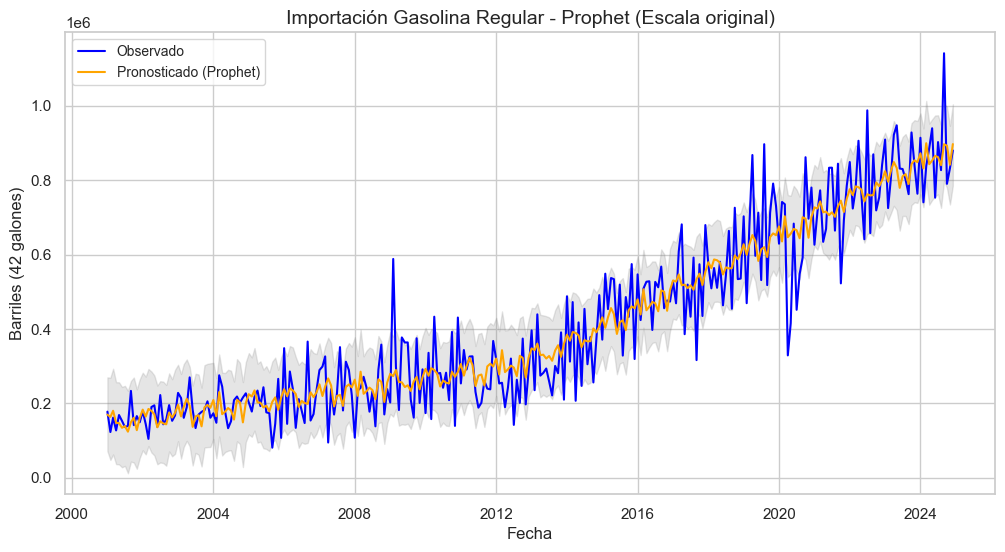

In [1118]:
# Graficamos
plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observado', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Pronosticado (Prophet)', color='orange')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='gray', alpha=0.2)
plt.title('Importación Gasolina Regular - Prophet (Escala original)')
plt.xlabel('Fecha')
plt.ylabel('Barriles (42 galones)')
plt.legend()
plt.show()

In [1119]:
serie_original = df_consumo['Gasolina regular']

df_prophet = pd.DataFrame({
    'ds': serie_original.index,
    'y': serie_original.values
})

# Inicializamos y entrenamos Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)


15:04:57 - cmdstanpy - INFO - Chain [1] start processing
15:04:57 - cmdstanpy - INFO - Chain [1] done processing


In [1120]:
# Hacemos predicciones en el mismo rango
future = modelo_prophet.make_future_dataframe(periods=0, freq='MS')  # sin agregar períodos futuros
forecast = modelo_prophet.predict(future)

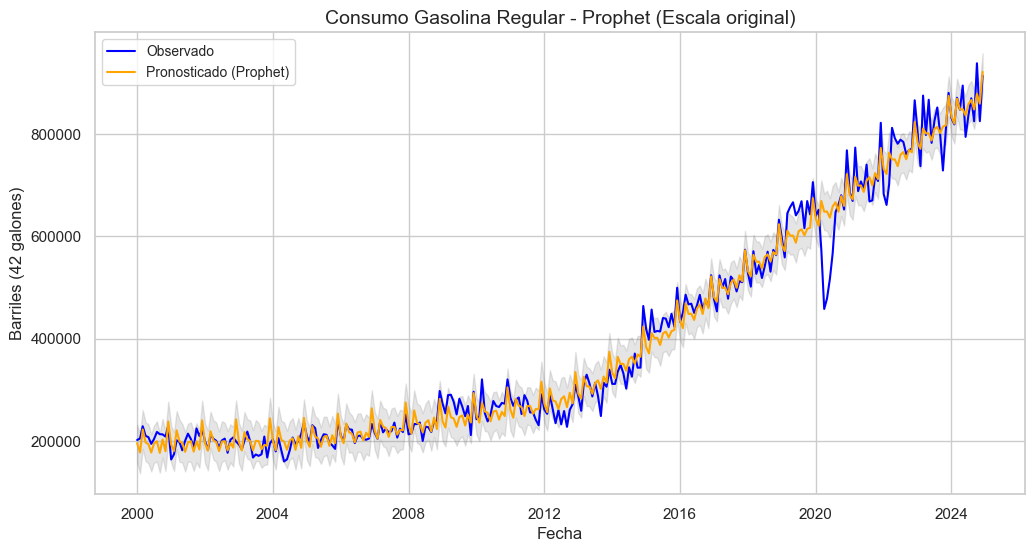

In [1121]:
# Graficamos
plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observado', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Pronosticado (Prophet)', color='orange')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='gray', alpha=0.2)
plt.title('Consumo Gasolina Regular - Prophet (Escala original)')
plt.xlabel('Fecha')
plt.ylabel('Barriles (42 galones)')
plt.legend()
plt.show()

¿Por qué Prophet parece ajustarse mejor?
- Prophet fue diseñado específicamente para series económicas y de demanda con tendencia + estacionalidad + outliers leves.

- Tiene un componente explícito para estacionalidad y detecta automáticamente patrones estacionales (anual, mensual, semanal).

- Suele ser más robusto a los picos y caídas irregulares que un ARIMA lineal.

- También suaviza menos que ARIMA, lo que hace que siga mejor los datos observados.


ARIMA es un modelo puramente basado en los valores anteriores y diferencias.

Si en los datos históricos aparece un evento inesperado (como la caída en la pandemia), ARIMA “aprende” ese valor y lo replica en las predicciones inmediatamente posteriores.

Eso hace que siga los valores atípicos fielmente, aunque a veces eso no sea deseable si sabemos que esos valores son “ruido” o eventos no repetibles.

Prophet descompone la serie en tendencia, estacionalidad y error.

Prophet suaviza los outliers porque trata los valores atípicos como ruido o anomalías, y no los incorpora plenamente a la tendencia futura.

Por eso, en las gráficas, Prophet no se “deprime” tanto durante la pandemia y sigue más la tendencia subyacente.

### Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan  buena es su predicción. 

Por el momento solo la haremos para el consumo de gasolina regular pero se puede seguir la misma logica para importacion y consumo de las otras 5 variables. 

In [1122]:
train = df_importacion['Gasolina regular'].loc[:'2021-12-01']
test = df_importacion['Gasolina regular'].loc['2022-01-01':]


In [1123]:
serie_log_train = np.log(train)

from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(serie_log_train, order=(1,1,1))
resultado = modelo.fit()


c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [1124]:
pred_log = resultado.get_forecast(steps=36)
pred_ci = pred_log.conf_int()
pred_exp = np.exp(pred_log.predicted_mean)


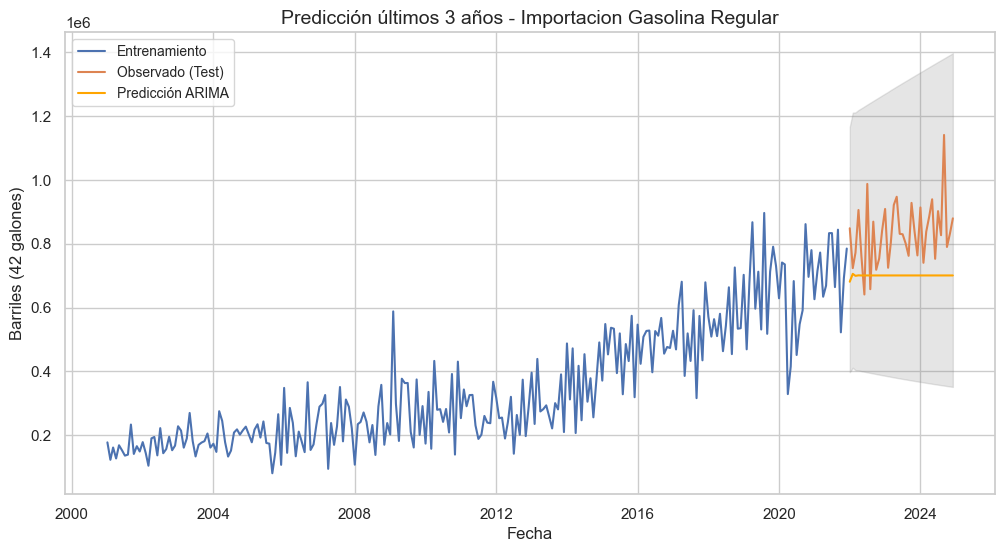

In [1125]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Observado (Test)')
plt.plot(test.index, pred_exp, label='Predicción ARIMA', color='orange')
plt.fill_between(test.index,
                 np.exp(pred_ci.iloc[:,0]),
                 np.exp(pred_ci.iloc[:,1]), color='gray', alpha=0.2)
plt.title("Predicción últimos 3 años - Importacion Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


In [1126]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, pred_exp)
print(f"MAE: {mae}")


MAE: 138349.995566052


Un MAE de 77,237 en una serie cuyo rango va de 200,000 a más de 1,000,000 es aceptable (≈7%–8% del valor promedio), pero indica que el modelo tiende a subestimar los valores reales en el tramo final.

Esto es común en ARIMA: prioriza el último nivel histórico y no extrapola bien tendencias prolongadas.

Azul: entrenamiento hasta 2021

Naranja: observado real 2022–2024

Línea plana naranja: predicción ARIMA

El ARIMA(1,1,1) entrenado hasta 2021 no logra capturar la tendencia creciente ni las variaciones del test.

La predicción es básicamente una prolongación de la media histórica de 2021, ignorando que la serie sigue creciendo y fluctuando.

Esto pasa porque:

    ARIMA(1,1,1) no incorpora estacionalidad explícita.

    Además, ARIMA a veces se “ancla” a la última tendencia lineal o al promedio.

    Tu serie parece tener no solo tendencia sino estacionalidad y posiblemente heterocedasticidad (varianza que crece con el tiempo).

### Probando la prediccion con prophet 

In [1127]:
train_prophet = df_importacion.reset_index()[['Fecha', 'Gasolina regular']]
train_prophet = train_prophet[train_prophet['Fecha'] <= '2021-12-01']
train_prophet.columns = ['ds', 'y']

In [1128]:
m = Prophet(yearly_seasonality=True)
m.fit(train_prophet)


15:04:58 - cmdstanpy - INFO - Chain [1] start processing
15:04:58 - cmdstanpy - INFO - Chain [1] done processing


In [1129]:
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)


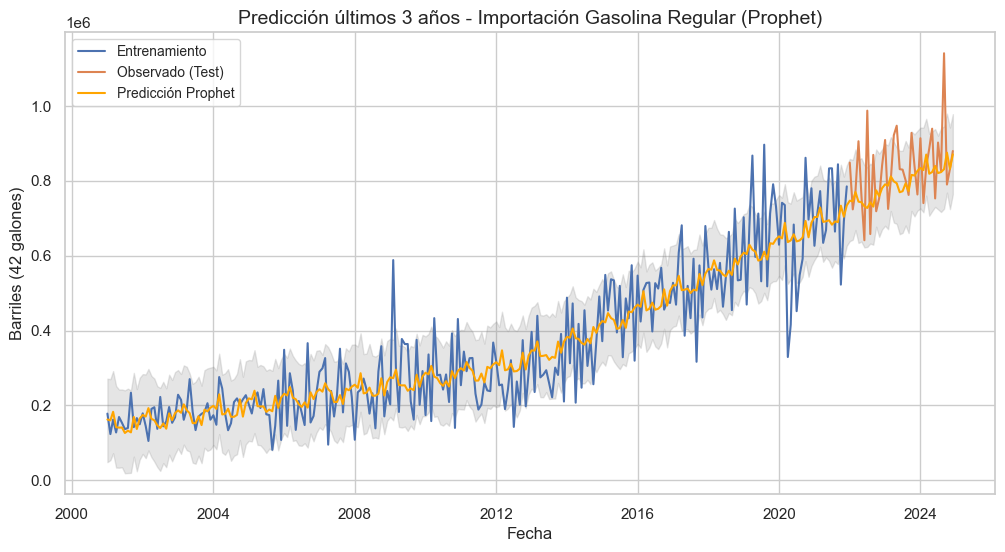

In [1130]:
test_prophet = df_importacion.reset_index()[['Fecha', 'Gasolina regular']]
test_prophet = test_prophet[test_prophet['Fecha'] >= '2022-01-01']

plt.figure(figsize=(12,6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Entrenamiento')
plt.plot(test_prophet['Fecha'], test_prophet['Gasolina regular'], label='Observado (Test)')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicción Prophet', color='orange')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'], forecast['yhat_upper'],
                 color='gray', alpha=0.2)
plt.title("Predicción últimos 3 años - Importación Gasolina Regular (Prophet)")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


Prophet (de Meta/Facebook) fue creado para modelar exactamente este tipo de series:

    Tendencia no necesariamente lineal (puede ser piecewise-linear o logística).

    Estacionalidad fuerte (anual, mensual, semanal).

    Permite añadir fácilmente vacaciones o shocks externos.

Prophet descompone la serie así:
y(t)=g(t)+s(t)+h(t)+ϵt

    g(t) → Tendencia

    s(t) → Estacionalidad

    h(t) → Eventos especiales

    ϵt​ → Ruido

Esta descomposición le permite adaptarse muy bien a series de tiempo económicas, de demanda, ventas, etc.

In [1131]:
pred_test = forecast.set_index('ds').loc['2022-01-01':'2024-12-01', 'yhat']
real_test = test_prophet.set_index('Fecha').loc['2022-01-01':'2024-12-01', 'Gasolina regular']

mae = mean_absolute_error(real_test, pred_test)
mape = (abs((real_test - pred_test) / real_test).mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 76835.31
MAPE: 8.81%


In [1132]:
# Leer el nuevo archivo
df_2025 = 'dataset/IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx'

df_importacion1 = pd.read_excel(df_2025, sheet_name="IMPORTACION", skiprows=6, nrows=5 )

cols_import = df_importacion1.columns.tolist()
print("Columnas Importación:")
print(cols_import)

Columnas Importación:
['Fecha', 'Aceites Lubricantes', 'Asfalto', 'Bunker C o Fuel Oil', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas Licuado de Petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas Lubricantes', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petróleo crudo', 'Solventes', 'Total importación']


ACa ya no existe el Diesel de alto azufre asi que no lo agregaremos... 

In [1133]:
df_importacion1 = df_importacion1[['Fecha', 'Gasolina regular', 'Gasolina superior']]

In [1134]:
print(df_importacion1['Fecha'].head())

0   2025-01-01
1   2025-02-01
2   2025-03-01
3   2025-04-01
4   2025-05-01
Name: Fecha, dtype: datetime64[ns]


In [1135]:
print(df_importacion1)


       Fecha  Gasolina regular  Gasolina superior
0 2025-01-01         788005.35          645188.60
1 2025-02-01         857375.76          686641.50
2 2025-03-01         800182.17          796513.62
3 2025-04-01         898147.98          643476.90
4 2025-05-01         785675.37          747443.53


In [1136]:
df_importacion1.set_index('Fecha', inplace=True)


In [1137]:
serie_actualizada = df_importacion1['Gasolina regular']
seria_2023 = df_importacion['Gasolina regular']

In [1138]:
train = df_importacion['Gasolina regular'].loc[:'2023-12-01']

In [1139]:
serie_log_train = np.log(train)
modelo = ARIMA(serie_log_train, order=(1,1,1))
resultado = modelo.fit()

c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\diego\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Hacmos hasta 17 meses porque solo tenemos datos hasta mayo de 2025. 

In [1140]:
pred_log = resultado.get_forecast(steps=17)
pred_exp = np.exp(pred_log.predicted_mean)
pred_ci = pred_log.conf_int()

In [1141]:
fechas_pred = pd.date_range(start='2024-01-01', periods=17, freq='MS')
pred_exp.index = fechas_pred
pred_ci.index = fechas_pred

Comparar con los reales 2025

In [1142]:
observado_2025 = df_importacion1['Gasolina regular']

In [1143]:

pred_2025_obs = pred_exp.loc[observado_2025.index]
pred_ci_2025_obs = pred_ci.loc[observado_2025.index]

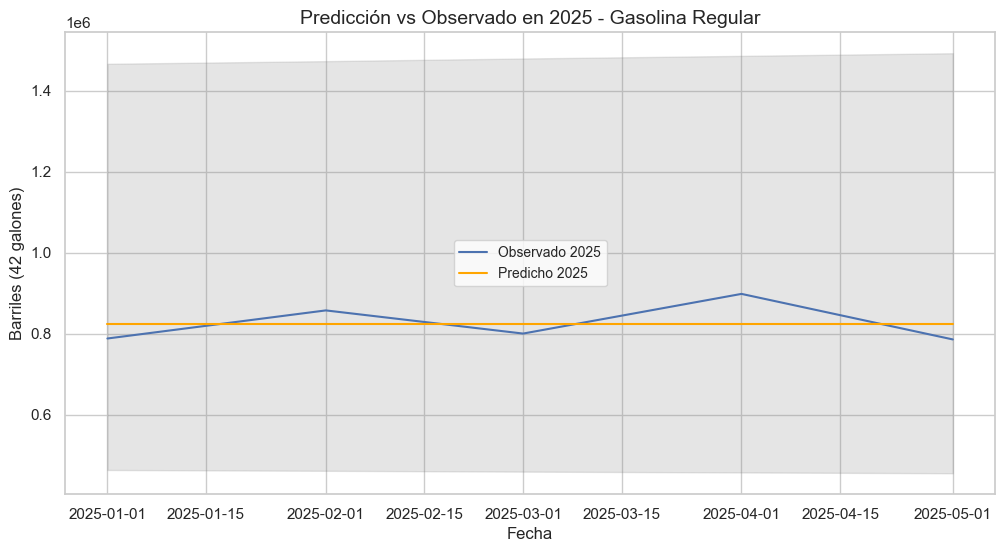

In [1144]:
plt.figure(figsize=(12,6))
plt.plot(observado_2025.index, observado_2025, label='Observado 2025')
plt.plot(observado_2025.index, pred_exp.loc['2025-01-01':], label='Predicho 2025', color='orange')
plt.fill_between(pred_exp.loc['2025-01-01':].index,
                 np.exp(pred_ci.iloc[12:,0]),  # índice 12: para 2025
                 np.exp(pred_ci.iloc[12:,1]), color='gray', alpha=0.2)
plt.title('Predicción vs Observado en 2025 - Gasolina Regular')
plt.xlabel('Fecha')
plt.ylabel('Barriles (42 galones)')
plt.legend()
plt.show()

In [1145]:
mae_2025 = mean_absolute_error(observado_2025, pred_exp.loc['2025-01-01':])
print(f"MAE enero–mayo 2025: {mae_2025}")

MAE enero–mayo 2025: 41189.5476825875


Ahora con prophet

In [ ]:
train_prophet = train.reset_index()
train_prophet.columns = ['ds', 'y']


In [ ]:
m = Prophet(yearly_seasonality=True)
m.fit(train_prophet)


15:04:59 - cmdstanpy - INFO - Chain [1] start processing
15:04:59 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=17, freq='MS')
forecast = m.predict(future)


In [1150]:
pred_exp = forecast.set_index('ds')['yhat'][-17:]
pred_ci  = forecast.set_index('ds')[['yhat_lower', 'yhat_upper']][-17:]


In [1151]:
fechas_pred = pd.date_range(start='2024-01-01', periods=17, freq='MS')
pred_exp.index = fechas_pred
pred_ci.index  = fechas_pred


In [1152]:
pred_2025_obs = pred_exp.loc[observado_2025.index]
pred_ci_2025_obs = pred_ci.loc[observado_2025.index]


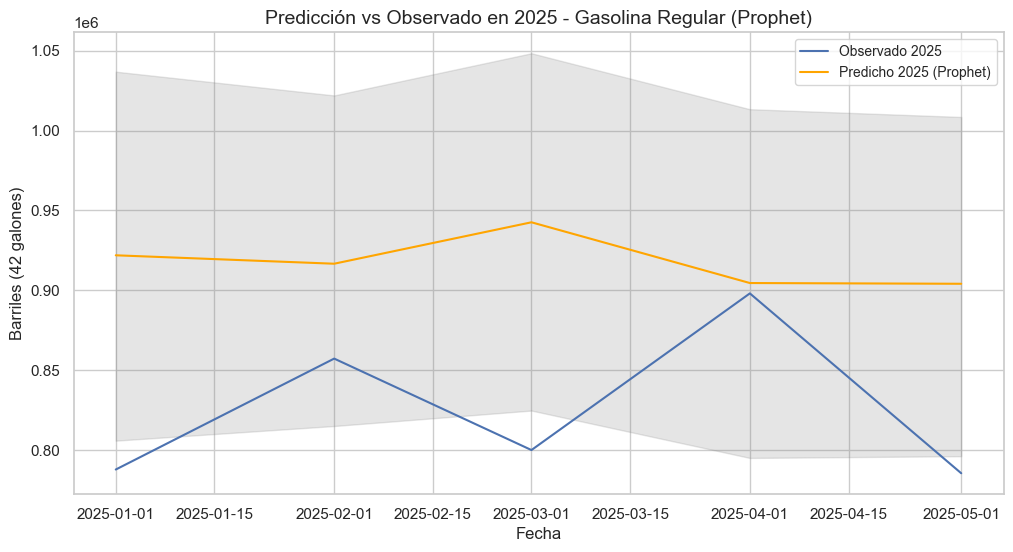

In [1153]:
plt.figure(figsize=(12,6))
plt.plot(observado_2025.index, observado_2025, label='Observado 2025')
plt.plot(observado_2025.index, pred_exp.loc['2025-01-01':], label='Predicho 2025 (Prophet)', color='orange')
plt.fill_between(pred_exp.loc['2025-01-01':].index,
                 pred_ci_2025_obs['yhat_lower'],
                 pred_ci_2025_obs['yhat_upper'], color='gray', alpha=0.2)
plt.title('Predicción vs Observado en 2025 - Gasolina Regular (Prophet)')
plt.xlabel('Fecha')
plt.ylabel('Barriles (42 galones)')
plt.legend()
plt.show()


Azul: observado 2025

Naranja: predicho por Prophet

Franja gris: intervalo de confianza

La línea naranja (Predicho Prophet) sigue una tendencia suave, casi constante, con ligeras variaciones.

La línea azul (observado) fluctúa más, subiendo y bajando mes a mes.

La predicción está dentro del intervalo de confianza para todos los meses.

### AHORA CONSUMO PARA PREDECIR A 2024

In [1155]:
train = df_consumo['Gasolina regular'].loc[:'2023-12-01']
real_2024 = df_consumo['Gasolina regular'].loc['2024-01-01':'2024-12-01']


In [1156]:
train_prophet = train.reset_index()
train_prophet.columns = ['ds', 'y']


In [1157]:
m = Prophet(yearly_seasonality=True)
m.fit(train_prophet)


15:11:58 - cmdstanpy - INFO - Chain [1] start processing
15:11:58 - cmdstanpy - INFO - Chain [1] done processing


In [1158]:
m = Prophet(yearly_seasonality=True)
m.fit(train_prophet)


15:12:04 - cmdstanpy - INFO - Chain [1] start processing
15:12:04 - cmdstanpy - INFO - Chain [1] done processing


In [1159]:
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)


In [1160]:
forecast.set_index('ds', inplace=True)

pred_2024 = forecast.loc['2024-01-01':'2024-12-01', 'yhat']
pred_ci_2024 = forecast.loc['2024-01-01':'2024-12-01', ['yhat_lower', 'yhat_upper']]


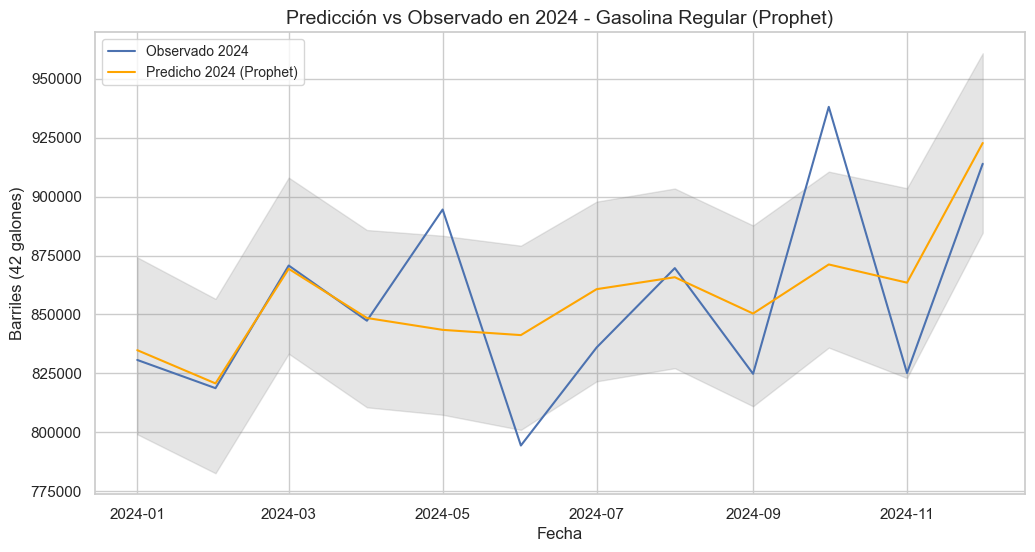

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(real_2024.index, real_2024, label='Observado 2024')
plt.plot(pred_2024.index, pred_2024, label='Predicho 2024 (Prophet)', color='orange')
plt.fill_between(pred_ci_2024.index,
                 pred_ci_2024['yhat_lower'],
                 pred_ci_2024['yhat_upper'], color='gray', alpha=0.2)
plt.title('Predicción vs Observado en 2024 - Consumo Gasolina Regular (Prophet)')
plt.xlabel('Fecha')
plt.ylabel('Barriles (42 galones)')
plt.legend()
plt.show()
